In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from IPython.utils import io
from PyEyeSim import EyeData

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
Path='C:/Users/Utente/Documents/University/Courses/P1&P2/EyeMovementDat/'
FilePath=Path+'merged.csv'
FixData=pd.read_csv(FilePath, sep=',',header=0, dtype={'subject': str})
print(np.shape(FixData))


(265703, 12)


In [4]:
# delete every row where the repetition is not 0 and record_number is not 0
FixData=FixData[FixData['repetition']==0]
FixData=FixData[FixData['record_number']==0]
print(np.shape(FixData))

(258562, 12)


dataset size:  (258562, 12)
presentation size:  x= 1280 pixels y= 960  pixels
presentation size:  x= 1280 pixels y= 960  pixels
Stimulus  not found !!, provide column as Stimulus =YourColumn , default:  Stimulus
subjectID  not found !!, provide column as subjectID =YourColumn , default:  subjectID
mean_x  not found !!, provide column as mean_x =YourColumn , default:  mean_x
mean_y  not found !!, provide column as mean_y =YourColumn , default:  mean_y
info found for 200 subjects, and 36 stimuli
sizecorrect =  True ; If stimulus not full screen, assume central presentation, use correction
run descriptive analysis


C:\Users\Utente\Documents\University\Master\PyEyeSim\PyEyeSim\__init__.py:281: UserWarning: Stim path not provided
  warnings.warn("Stim path not provided")


Data for  200 observers and  36  stimuli.
Mean fixation number:  36.89  +/-  9.95
fixation duration not asked for
Num of trials with zero fixations: 0
Num valid trials  7028
Mean X location:  476.5  +/-  92.1  pixels
Mean Y location:  465.2  +/-  65.3  pixels
Mean saccade  amplitude:  79.9  +/-  19.2  pixels
Mean scanpath  length:  2482.0  +/-  566.8  pixels
Data for  200 observers and  36  stimuli.
Mean fixation number:  36.89  +/-  9.95
fixation duration not asked for
Num of trials with zero fixations: 0
Num valid trials  7028
Mean X location:  476.5  +/-  92.1  pixels
Mean Y location:  465.2  +/-  65.3  pixels
Mean saccade  amplitude:  79.9  +/-  19.2  pixels
Mean scanpath  length:  2482.0  +/-  566.8  pixels


(array([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,   11,
          12,   13,   14,   15,   16,   17,   18,   19,   20,   21,   22,
          23,   24,   25,   26,   27,   28,   29,   30, 8881, 8882, 8883,
        8884, 8885, 8886], dtype=int64),
 array(['21418', '21422', '21463', '21468', '21469', '21474', '21480',
        '21498', '21513', '21522', '21526', '21531', '21568', '21629',
        '21630', '21636', '21641', '21653', '21658', '21667', '21680',
        '21683', '21685', '21699', '21706', '21735', '21774', '21811',
        '21819', '21820', '21862', '21878', '21889', '21927', '21930',
        '21939', '21946', '22018', '22036', '22108', '22109', '22127',
        '22129', '22138', '22149', '22168', '22174', '22180', '22181',
        '22186', '22204', '22214', '22219', '22228', '22234', '22239',
        '22242', '22261', '22271', '22279', '22291', '22322', '22324',
        '22327', '22341', '22346', '22376', '22378', '22383', '22388',
        '22394', '22410', '

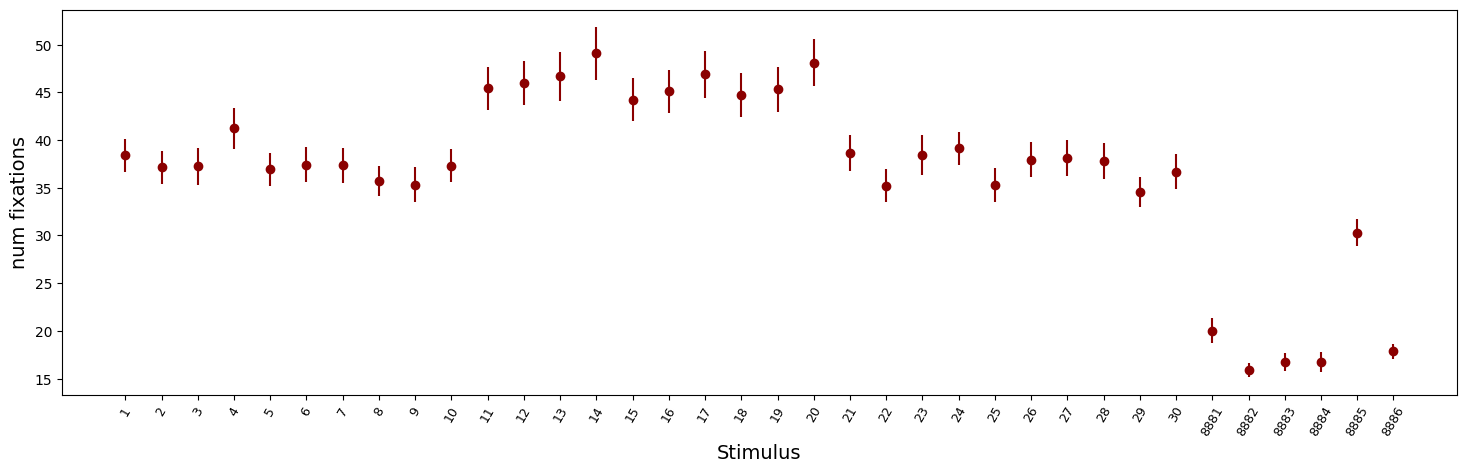

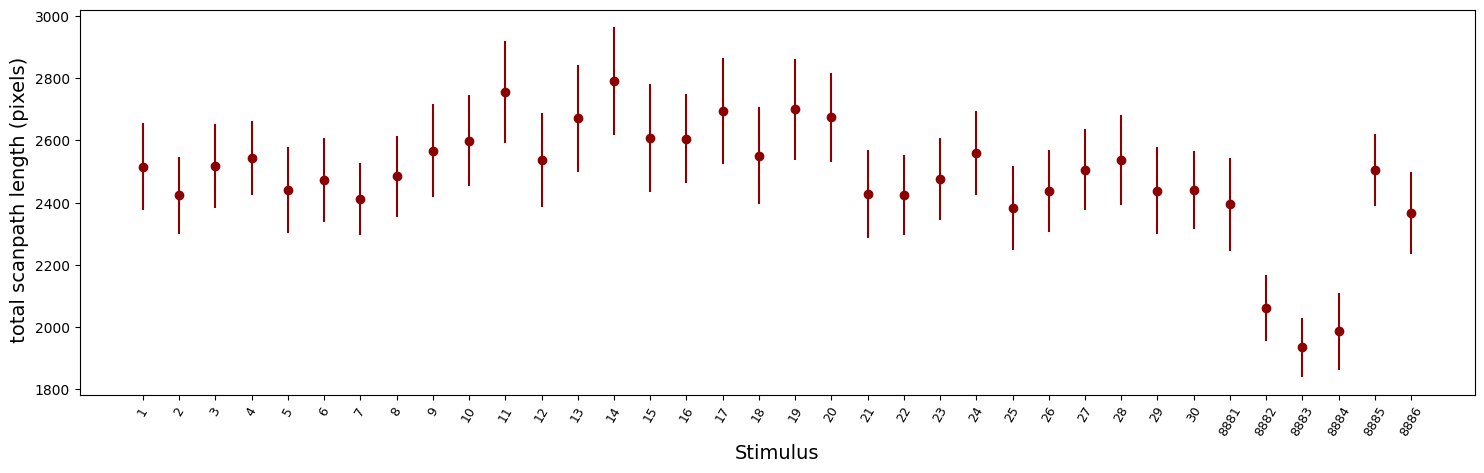

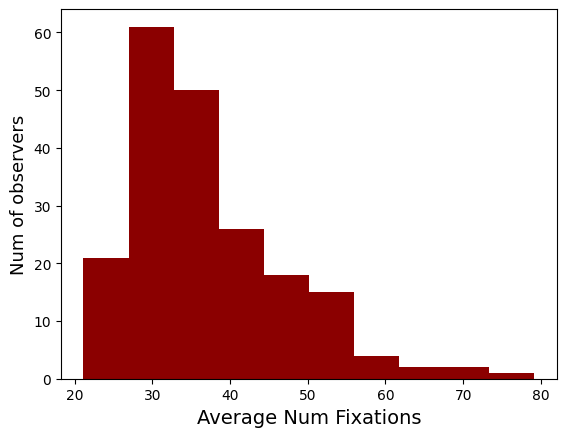

In [5]:

sizeX,sizeY=1280, 960


DyslexiaDat=EyeData(FixData,sizeX,sizeY)
DyslexiaDat.DataInfo(mean_x='fix_x',mean_y='fix_y',FixDuration='duration_ms',Stimulus='stimulus',subjectID='subject')
DyslexiaDat.RunDescriptiveFix(Visual=1)

---

In [6]:
complete_data = []
missing_data = {}
subject_with_missing_data = {}
set_subj = set()
map_stim_subj = {}
for i in range(0,36):
    FixGr=np.array(DyslexiaDat.nfix[117:,i])
    if not np.isnan(FixGr).any():
        complete_data.append(i)
    if np.isnan(FixGr).any():
        missing_data[i] = np.isnan(FixGr).sum()
        for x in np.where(np.isnan(FixGr))[0]:
            subject_with_missing_data[117+x] = +1
            map_stim_subj[i] = map_stim_subj.get(i, []) + [DyslexiaDat.subjects[117+x]]
            set_subj.add(117+x)


print(f'{len(complete_data)} Stimuli with complete data: {complete_data}')
print(f'{len(missing_data)} Stimuli with Missing data: {missing_data}')
print(f'Max subject that have not seen the stimulus: {max(missing_data.values())}')
print(f'{len(subject_with_missing_data)} Subjects with missing data: {subject_with_missing_data}')

3 Stimuli with complete data: [7, 32, 33]
33 Stimuli with Missing data: {0: 1, 1: 3, 2: 3, 3: 1, 4: 4, 5: 3, 6: 4, 8: 1, 9: 7, 10: 6, 11: 7, 12: 3, 13: 2, 14: 4, 15: 4, 16: 6, 17: 3, 18: 3, 19: 4, 20: 4, 21: 2, 22: 7, 23: 4, 24: 4, 25: 3, 26: 2, 27: 5, 28: 5, 29: 3, 30: 5, 31: 6, 34: 8, 35: 5}
Max subject that have not seen the stimulus: 8
57 Subjects with missing data: {177: 1, 127: 1, 160: 1, 181: 1, 161: 1, 199: 1, 121: 1, 173: 1, 198: 1, 158: 1, 167: 1, 196: 1, 142: 1, 146: 1, 182: 1, 119: 1, 120: 1, 124: 1, 136: 1, 147: 1, 130: 1, 139: 1, 153: 1, 166: 1, 191: 1, 184: 1, 171: 1, 149: 1, 154: 1, 169: 1, 197: 1, 155: 1, 163: 1, 150: 1, 179: 1, 186: 1, 128: 1, 125: 1, 152: 1, 176: 1, 133: 1, 138: 1, 162: 1, 188: 1, 134: 1, 164: 1, 141: 1, 165: 1, 195: 1, 122: 1, 123: 1, 126: 1, 137: 1, 185: 1, 145: 1, 159: 1, 178: 1}


In [7]:
s = 0
for i in range(0,10):
    if i not in complete_data:
        s += missing_data[i]
print(f'{s} Subjects with missing data for the first 10 stimuli')

s = 0
for i in range(11,20):
    if i not in complete_data:
        s += missing_data[i]
print(f'{s} Subjects with missing data for the stimuli from 11 to 20 stimuli')

s = 0
for i in range(21,30):
    if i not in complete_data:
        s += missing_data[i]
print(f'{s} Subjects with missing data for the stimuli from 21 to 30 stimuli')

27 Subjects with missing data for the first 10 stimuli
36 Subjects with missing data for the stimuli from 11 to 20 stimuli
35 Subjects with missing data for the stimuli from 21 to 30 stimuli


Here we check for the Graz subjects, the amount of stimuli and subject that have some empty data. In other words, we check for every subjects wich and how many stimuli they have not seen (or have been delete because with repetition > 0 and record_number > 0)

Compared to the Munich data here it seems to be not possible to remove, either the stimuli with subject that have not seen them or the subjects that have not seen a specific stimulus.

The solution is to exclude dynamically the subjects that have not seen a specific stimulus.

---

In [8]:
WhichC, WhichCN = DyslexiaDat.GetGroups('Group')

Conditions [ 1.  2.  3.  4. nan]


In [9]:
# convert WhichCN to a numpy array of type float
WhichCN = np.array(WhichCN, dtype=float)
# substitute nan values with max value + 1
WhichCN[np.isnan(WhichCN)] = 0
WhichCN = WhichCN.astype(int)
WhichCN

array([1, 4, 4, 3, 3, 3, 2, 4, 4, 4, 2, 3, 3, 3, 3, 1, 1, 1, 1, 1, 3, 4,
       3, 1, 1, 1, 4, 1, 4, 4, 3, 4, 0, 1, 1, 4, 4, 2, 1, 1, 2, 1, 4, 1,
       2, 3, 1, 2, 4, 1, 4, 3, 2, 2, 2, 1, 4, 1, 1, 1, 2, 3, 4, 4, 1, 2,
       4, 2, 1, 2, 1, 1, 1, 1, 3, 3, 2, 4, 2, 4, 1, 4, 2, 1, 2, 3, 3, 2,
       4, 1, 1, 3, 3, 1, 0, 1, 4, 4, 2, 0, 4, 4, 4, 3, 4, 2, 2, 1, 4, 4,
       4, 4, 4, 4, 3, 1, 1, 3, 4, 2, 3, 3, 4, 3, 4, 4, 4, 3, 4, 4, 1, 2,
       1, 3, 1, 3, 3, 3, 3, 4, 3, 3, 2, 4, 4, 3, 2, 4, 1, 1, 0, 4, 1, 4,
       1, 4, 4, 4, 4, 3, 1, 1, 4, 3, 3, 3, 1, 2, 4, 2, 3, 1, 4, 4, 3, 3,
       3, 2, 4, 4, 4, 4, 1, 3, 0, 0, 3, 2, 4, 4, 4, 4, 4, 1, 1, 3, 1, 4,
       4, 0])

In [10]:
WhichC = np.array(WhichC, dtype=float)
WhichC[np.isnan(WhichC)] = 4
WhichC = WhichC.astype(int)
WhichC

array([0, 3, 3, 2, 2, 2, 1, 3, 3, 3, 1, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 3,
       2, 0, 0, 0, 3, 0, 3, 3, 2, 3, 4, 0, 0, 3, 3, 1, 0, 0, 1, 0, 3, 0,
       1, 2, 0, 1, 3, 0, 3, 2, 1, 1, 1, 0, 3, 0, 0, 0, 1, 2, 3, 3, 0, 1,
       3, 1, 0, 1, 0, 0, 0, 0, 2, 2, 1, 3, 1, 3, 0, 3, 1, 0, 1, 2, 2, 1,
       3, 0, 0, 2, 2, 0, 4, 0, 3, 3, 1, 4, 3, 3, 3, 2, 3, 1, 1, 0, 3, 3,
       3, 3, 3, 3, 2, 0, 0, 2, 3, 1, 2, 2, 3, 2, 3, 3, 3, 2, 3, 3, 0, 1,
       0, 2, 0, 2, 2, 2, 2, 3, 2, 2, 1, 3, 3, 2, 1, 3, 0, 0, 4, 3, 0, 3,
       0, 3, 3, 3, 3, 2, 0, 0, 3, 2, 2, 2, 0, 1, 3, 1, 2, 0, 3, 3, 2, 2,
       2, 1, 3, 3, 3, 3, 0, 2, 4, 4, 2, 1, 3, 3, 3, 3, 3, 0, 0, 2, 0, 3,
       3, 4])

In [11]:
from PyEyeSim.visualhelper import MeanPlot
from scipy import stats
def CompareGroupsFix(self,WhichC, class_labels=None):
    '''
    Description: Run a set of between-group fixation comparisons, generate plots, and print descriptive statistics.
    should work for 2-4 groups
    calculates:
    - number of fixations
    - entropy of fixations (potentially long run time)
    - total scanpath length
    - saccade amplitude

    prints descriptive stats of the above
    print pairwise comparison of groups with the above measures
    
    Arguments: 
    betwcond (str): Name of the conditions for between-group fixation comparisons.
    '''
    
    print('!runnning between group comparison')
    if hasattr(self,'entropies')==False:   # check if entropy has already been calculated
        print('Calculating entropy')
        Entropies,self.entropmax,self.entropies_ind=self.GetEntropies()
    Cols=['darkblue','cornflowerblue','darkred','orange','salmon']
    #plt.figure(figsize=(8,8))
    fig,ax=plt.subplots(ncols=2,nrows=2,figsize=(10,8))
    Entrs=[]
    Fixies=[]
    ScanpLs=[]
    SaccAmpls=[] 
    for cc,c in enumerate(self.Conds):
        if np.isnan(c):
            continue
        c = int(c)
        Idx=np.nonzero(WhichC==cc)[0]
        FixGr=np.array(self.nfix[Idx,:])
        EntrGr=self.entropies_ind[Idx,:]
        Entrs.append(np.nanmean(EntrGr,1))
        Fixies.append(np.nanmean(FixGr,1))
        ScanpLs.append(np.nanmean(self.len_scanpath[Idx,:],1))
        SaccAmpls.append(np.nanmean(self.sacc_ampl[Idx,:],1))
     
        print(cc,c,'num participants: ',len(Idx))

        print(cc,c,'Num fix= ',np.round(np.mean(np.nanmean(FixGr,1)),2),'+/-',np.round(np.std(np.nanmean(FixGr,1)),2))
        print(cc,c,'max num fix= ',np.round(np.max(np.nanmean(FixGr,1)),2))
        print(cc,c,'min num fix= ',np.round(np.min(np.nanmean(FixGr,1)),2))
        print(cc,c,'Entropy= ',np.round(np.mean(np.nanmean(EntrGr,1)),2),'+/-',np.round(np.std(np.nanmean(EntrGr,1)),2))
        print(cc,c,'tot scanpath len = ',np.round(np.mean(np.nanmean(self.len_scanpath[Idx,:],1)),2),'+/-',np.round(np.std(np.nanmean(self.len_scanpath[Idx,:],1)),2),'pix')
        print(cc,c,'saccade amplitude = ',np.round(np.mean(np.nanmean(self.sacc_ampl[Idx,:],1)),2),'+/-',np.round(np.std(np.nanmean(self.sacc_ampl[Idx,:],1)),2),'pix')
        print('')
        MeanPlot(self.np,FixGr,yLab='Num Fixations',xtickL=self.stimuli,label=class_labels[cc],color=Cols[cc],ax=ax[0,0])
        MeanPlot(self.np,EntrGr,yLab='Entropy',xtickL=self.stimuli,label=class_labels[cc],color=Cols[cc],ax=ax[0,1])
        MeanPlot(self.np,self.len_scanpath[Idx,:],yLab='tot scanpath len (pix)',xtickL=self.stimuli,label=class_labels[cc],color=Cols[cc],ax=ax[1,0])
        MeanPlot(self.np,self.sacc_ampl[Idx,:],yLab='saccade amplitude (pix)',xtickL=self.stimuli,label=class_labels[cc],color=Cols[cc],ax=ax[1,1])
    
    
    plt.legend()
    plt.tight_layout()
    
    for gr1 in range(len(self.Conds)):
        if np.isnan(self.Conds[gr1]):
            continue
        for gr2 in range(len(self.Conds)):
            if np.isnan(self.Conds[gr2]):
                continue
            if gr1 < gr2:
                print()
                t,p=stats.ttest_ind(Entrs[gr1],Entrs[gr2])
                print(' ')
                print('Overall group differences: ',self.Conds[gr1],'vs',self.Conds[gr2] )
                print('Entropy t=',np.round(t,4),', p=',np.round(p,4))
                #if pglib:
                 #   pg.ttest(Fixies[0],Fixies[1],paired=False)
                #else:
                t,p=stats.ttest_ind(Fixies[gr1],Fixies[gr2])
                print('Num Fix t=',np.round(t,4),', p= ',np.round(p,4))
                t,p=stats.ttest_ind(ScanpLs[gr1],ScanpLs[gr2])
                
            
                print('Scanpath lengths t=',np.round(t,4),', p=',np.round(p,4))
                t,p=stats.ttest_ind(SaccAmpls[gr1],SaccAmpls[gr2])
            
                print('Saccade amplitudes t=',np.round(t,4),', p=',np.round(p,4))
                print(' ')

    
    return 

!runnning between group comparison
Calculating entropy
resolution x = 1280  y = 960


c:\ProgramData\anaconda3\envs\eyesim\Lib\site-packages\scipy\stats\_entropy.py:147: RuntimeWarning: divide by zero encountered in divide
  pk = 1.0*pk / xp.sum(pk, axis=axis, keepdims=True)  # type: ignore[operator]


0 1 4.35 maximum entropy 6.16
resolution x = 1280  y = 960
1 2 4.32 maximum entropy 6.16
resolution x = 1280  y = 960
2 3 4.3 maximum entropy 6.16
resolution x = 1280  y = 960
3 4 4.4 maximum entropy 6.16
resolution x = 1280  y = 960
4 5 4.42 maximum entropy 6.16
resolution x = 1280  y = 960
5 6 4.32 maximum entropy 6.16
resolution x = 1280  y = 960
6 7 4.36 maximum entropy 6.16
resolution x = 1280  y = 960
7 8 4.34 maximum entropy 6.16
resolution x = 1280  y = 960
8 9 4.42 maximum entropy 6.16
resolution x = 1280  y = 960
9 10 4.31 maximum entropy 6.16
resolution x = 1280  y = 960
10 11 4.3 maximum entropy 6.16
resolution x = 1280  y = 960
11 12 4.32 maximum entropy 6.16
resolution x = 1280  y = 960
12 13 4.33 maximum entropy 6.16
resolution x = 1280  y = 960
13 14 4.31 maximum entropy 6.16
resolution x = 1280  y = 960
14 15 4.29 maximum entropy 6.16
resolution x = 1280  y = 960
15 16 4.37 maximum entropy 6.16
resolution x = 1280  y = 960
16 17 4.37 maximum entropy 6.16
resolution x =

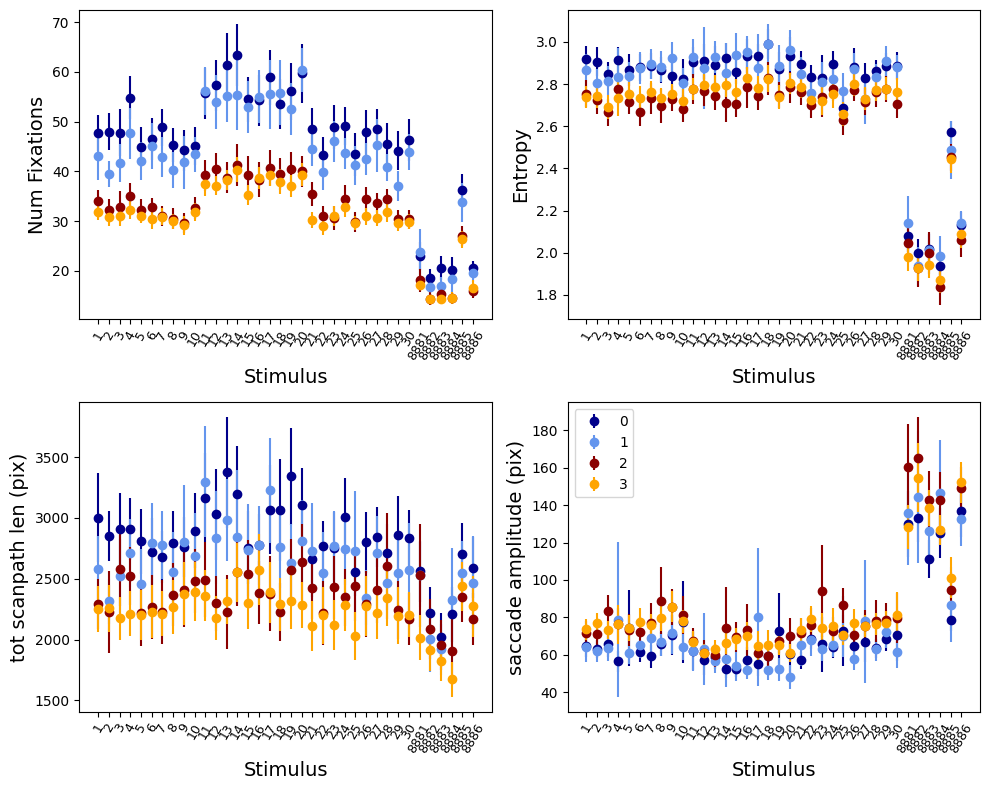

In [12]:
CompareGroupsFix(DyslexiaDat, WhichC, class_labels=['0','1','2','3'])

In [13]:
WhichC, WhichCN = DyslexiaDat.GetGroups('Group')

Conditions [ 1.  2.  3.  4. nan]


In [14]:
WhichC = np.array(WhichC, dtype=float)
WhichC[np.isnan(WhichC)] = 4
WhichC = WhichC.astype(int)
WhichC[WhichC == 0] = 1
WhichC[WhichC == 2] = 0
WhichC[WhichC == 3] = 0
WhichC[WhichC == 4] = 0
WhichC

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0])

In [15]:
# convert WhichCN to a numpy array of type float
WhichCN = np.array(WhichCN, dtype=float)
# substitute nan values with max value + 1
WhichCN[np.isnan(WhichCN)] = 0 
WhichCN = WhichCN.astype(int)
# Trasform all 4 in 0
WhichCN[WhichCN == 4] = 0
WhichCN[WhichCN == 3] = 0
# Trasform all 1,2 in 1
WhichCN[WhichCN == 2] = 1
WhichCN

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0])

In [16]:
from PyEyeSim.visualhelper import MeanPlot
from scipy import stats
def CompareGroupsFix(self,WhichC, class_labels=None):
    '''
    Description: Run a set of between-group fixation comparisons, generate plots, and print descriptive statistics.
    should work for 2-4 groups
    calculates:
    - number of fixations
    - entropy of fixations (potentially long run time)
    - total scanpath length
    - saccade amplitude

    prints descriptive stats of the above
    print pairwise comparison of groups with the above measures
    
    Arguments: 
    betwcond (str): Name of the conditions for between-group fixation comparisons.
    '''
    
    print('!runnning between group comparison')
    if hasattr(self,'entropies')==False:   # check if entropy has already been calculated
        print('Calculating entropy')
        Entropies,self.entropmax,self.entropies_ind=self.GetEntropies()
    Cols=['darkblue','cornflowerblue','darkred','orange','salmon']
    #plt.figure(figsize=(8,8))
    fig,ax=plt.subplots(ncols=2,nrows=2,figsize=(10,8))
    Entrs=[]
    Fixies=[]
    ScanpLs=[]
    SaccAmpls=[] 
    for cc,c in enumerate(class_labels):
        c = int(c)
        Idx=np.nonzero(WhichC==cc)[0]
        FixGr=np.array(self.nfix[Idx,:])
        EntrGr=self.entropies_ind[Idx,:]
        Entrs.append(np.nanmean(EntrGr,1))
        Fixies.append(np.nanmean(FixGr,1))
        ScanpLs.append(np.nanmean(self.len_scanpath[Idx,:],1))
        SaccAmpls.append(np.nanmean(self.sacc_ampl[Idx,:],1))
     
        print(cc,c,'num participants: ',len(Idx))

        print(cc,c,'Num fix= ',np.round(np.mean(np.nanmean(FixGr,1)),2),'+/-',np.round(np.std(np.nanmean(FixGr,1)),2))
        print(cc,c,'max num fix= ',np.round(np.max(np.nanmean(FixGr,1)),2))
        print(cc,c,'min num fix= ',np.round(np.min(np.nanmean(FixGr,1)),2))
        print(cc,c,'Entropy= ',np.round(np.mean(np.nanmean(EntrGr,1)),2),'+/-',np.round(np.std(np.nanmean(EntrGr,1)),2))
        print(cc,c,'tot scanpath len = ',np.round(np.mean(np.nanmean(self.len_scanpath[Idx,:],1)),2),'+/-',np.round(np.std(np.nanmean(self.len_scanpath[Idx,:],1)),2),'pix')
        print(cc,c,'saccade amplitude = ',np.round(np.mean(np.nanmean(self.sacc_ampl[Idx,:],1)),2),'+/-',np.round(np.std(np.nanmean(self.sacc_ampl[Idx,:],1)),2),'pix')
        print('')
        MeanPlot(self.np,FixGr,yLab='Num Fixations',xtickL=self.stimuli,label=class_labels[c],color=Cols[cc],ax=ax[0,0])
        MeanPlot(self.np,EntrGr,yLab='Entropy',xtickL=self.stimuli,label=class_labels[c],color=Cols[cc],ax=ax[0,1])
        MeanPlot(self.np,self.len_scanpath[Idx,:],yLab='tot scanpath len (pix)',xtickL=self.stimuli,label=class_labels[c],color=Cols[cc],ax=ax[1,0])
        MeanPlot(self.np,self.sacc_ampl[Idx,:],yLab='saccade amplitude (pix)',xtickL=self.stimuli,label=class_labels[c],color=Cols[cc],ax=ax[1,1])
    
    
    plt.legend()
    plt.tight_layout()

    return 

!runnning between group comparison
0 0 num participants:  119
0 0 Num fix=  31.52 +/- 6.06
0 0 max num fix=  68.45
0 0 min num fix=  21.14
0 0 Entropy=  2.63 +/- 0.17
0 0 tot scanpath len =  2300.54 +/- 531.55 pix
0 0 saccade amplitude =  84.34 +/- 20.42 pix

1 1 num participants:  81
1 1 Num fix=  44.77 +/- 9.27
1 1 max num fix=  79.17
1 1 min num fix=  30.09
1 1 Entropy=  2.74 +/- 0.17
1 1 tot scanpath len =  2748.51 +/- 508.78 pix
1 1 saccade amplitude =  73.46 +/- 15.18 pix



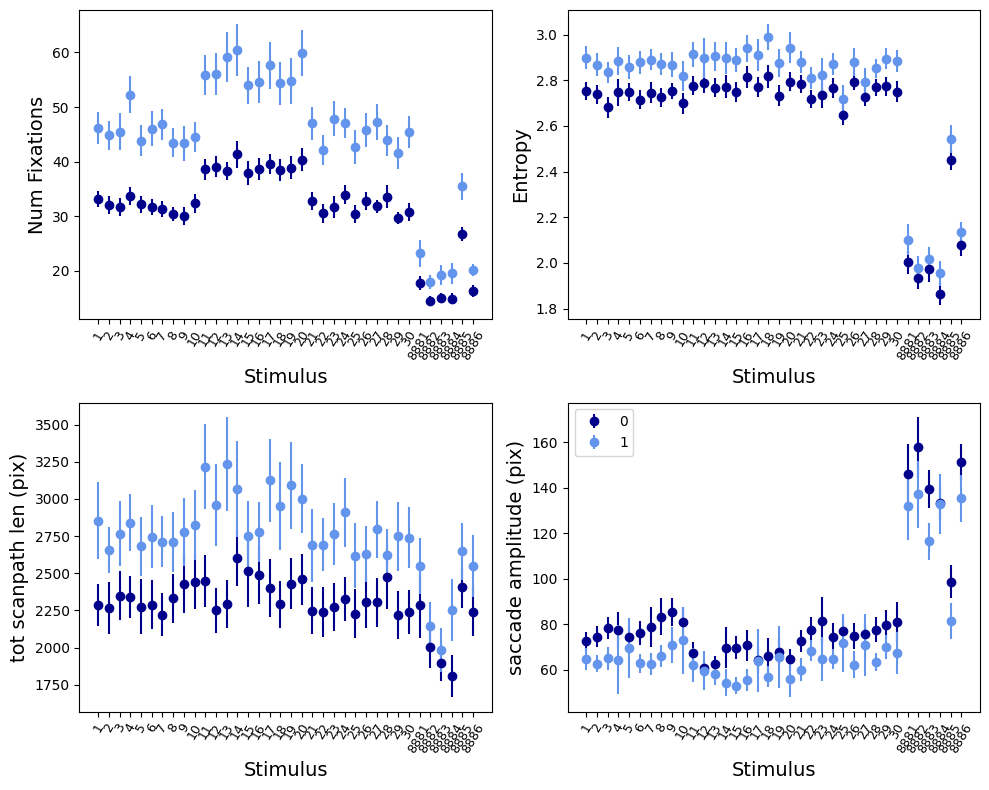

In [17]:
CompareGroupsFix(DyslexiaDat, WhichC, class_labels=['0','1'])

In [18]:
Idx=np.nonzero(WhichC==1)[0]
FixGr=np.array(DyslexiaDat.nfix[Idx,19])
print(FixGr)
#remove nan values
FixGr = FixGr[~np.isnan(FixGr)]
print('max num fix= ',np.max(FixGr))
print('min num fix= ',np.min(FixGr))
print('average num fix= ',np.mean(FixGr))

[ 17.  53.  72.  48.  42.  93.  51.  62.  48.  56.  59.  70.  49.  73.
  69.  50.  53.  54.  42.  57.  nan  54.  66.  52.  34.  47.  78. 107.
  50.  54.  41.  49.  29.  49.  52.  82.  62.  61.  58.  98.  85.  67.
  71.  49.  nan  39.  49.  70.  68. 102.  69.  40.  44.  53.  58.  67.
  64. 104.  57.  96.  65.  76.  65.  64.  69.  39.   9.  nan  77.  nan
  43.  76.  58.  84.  46.  60.  61.  74.  41.  49.  65.]
max num fix=  107.0
min num fix=  9.0
average num fix=  59.922077922077925


In [19]:
Idx=np.nonzero(WhichC==0)[0]
FixGr=np.array(DyslexiaDat.nfix[Idx,19])
print(FixGr)
# remove 1 max and 1 min value
FixGr = FixGr[~np.isnan(FixGr)]
print('max num fix= ',np.max(FixGr))
print('min num fix= ',np.min(FixGr))
print('average num fix= ',np.mean(FixGr))

[43. 45. 32. 46. 30. 56. 27. 32. 53. 40. 33. 49. 54. 41. 47. 33. 73. 25.
 29. 45. 99. 31. 48. 28. 43. 50. 25. 48. 50. 32. 38. 31. 51. 28. 27. 29.
 35. 38. 32. 50. 35. 45. 45. 30. 48. 37. 54. 52. 42. 42. 51. 42. 33. 40.
 38. 38. 42. 37. 32. 27. 42. 40. 40. 28. 37. 26. nan 44. 51. 39. 45. 46.
 34. 34. 38. 49. 52. 57. 40. 33. 36. 42. 58. 46. 30. 32. 37. 51. 41. 31.
 77. 46. 38. 36. 33. 48. 43. 50. 42. 24. 28. nan 20. 29. 24. 35. 30. 38.
 56. 39. 38. 34. 35. 39. 47. 30. 44. 39. 45.]
max num fix=  99.0
min num fix=  20.0
average num fix=  40.35897435897436


In [20]:
SaccadeObj=DyslexiaDat.GetSaccades()
Saccades=DyslexiaDat.SaccadeSel(SaccadeObj,nHor=1)

In [21]:
def angles_entropy(angles, bins):
    hist, _ = np.histogram(angles, bins=bins)
    hist = hist / hist.sum()
    return -np.sum(hist * np.log2(hist))

In [22]:
Saccades = Saccades[0:117, :]
WhichC_Munich = WhichC[0:117]

Group 0
Angle Entropy: 7.114319960071477
---------------------------------------------------------
Group 1
Angle Entropy: 7.396763654882683
---------------------------------------------------------
 
t-test between groups 0 and 1
t: -1.559467845302823, p: 0.1188877513706335
 


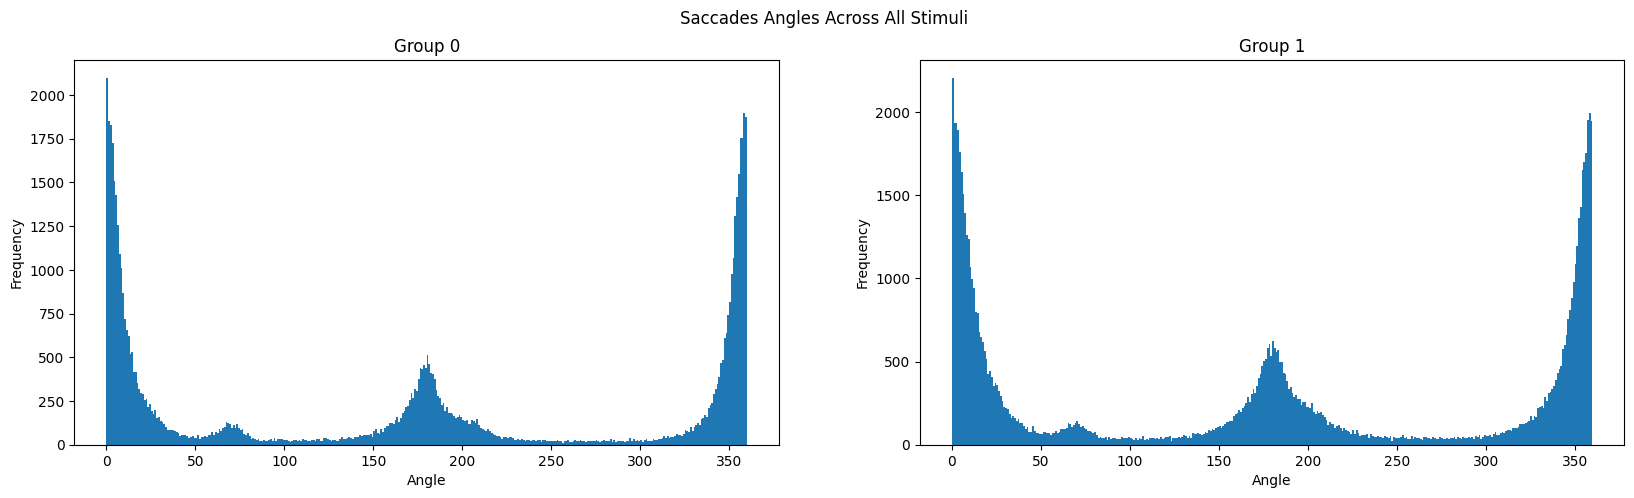

In [23]:
from scipy.stats import ttest_ind
# Initialize variables to store aggregated data
aggregated_angles = {group: [] for group in np.unique(WhichC_Munich)}

# Iterate over all stimuli
for stim in range(DyslexiaDat.np):
    groups = np.unique(WhichC_Munich)
    group_saccades = []
    
    # Collect saccades for each group
    for group in groups:
        group_saccades.append(Saccades[WhichC_Munich == group, stim, :, :])
    
    # Aggregate angles for each group
    for j, group in enumerate(group_saccades):
        for subj in group:
            for h in range(subj.shape[0]):
                for v in range(subj.shape[1]):
                    for val in subj[h, v]:
                        aggregated_angles[groups[j]].append(val)

# Plot the aggregated results
fig, ax = plt.subplots(1, len(aggregated_angles), figsize=(20, 5))
fig.suptitle('Saccades Angles Across All Stimuli')

for i, (group, angles) in enumerate(aggregated_angles.items()):
    ax[i].hist(angles, bins=360)
    ax[i].set_title(f'Group {group}')
    ax[i].set_xlabel('Angle')
    ax[i].set_ylabel('Frequency')
    print(f'Group {group}')
    print(f'Angle Entropy: {angles_entropy(angles, 360)}')
    print(f'---------------------------------------------------------')

# Perform t-test between groups
group_keys = list(aggregated_angles.keys())
t, p = ttest_ind(aggregated_angles[group_keys[0]], aggregated_angles[group_keys[1]])
print(' ')
print(f't-test between groups {group_keys[0]} and {group_keys[1]}')
print(f't: {t}, p: {p}')
print(' ')

plt.show()


In [24]:
# create a list of subjects from 117 to 200
GrazSubs = DyslexiaDat.subjects[117:200]
GrazSubs_Idx = list(range(117,200))
MunichSubs_Idx = list(range(0,117))

In [25]:
# SimVals[subjects][group]
def calculate_accuracy(SimVals, WhichCN, Idx):
    correct_labels = 0

    for i, subj in enumerate(Idx):
        # Calculate the mean for each group for the current subject
        predicted_group = 0
        min_mean = np.inf
        for j in range(np.unique(WhichCN).size):
            if len(SimVals[i][j]) > 0:
                mean = np.mean(SimVals[i][j])
            else:
                continue
            if mean <= min_mean:
                min_mean = mean
                predicted_group = j
        
        # Check if the predicted group matches the true group
        if predicted_group == WhichCN[subj]:
            correct_labels += 1
    
    # Calculate accuracy
    accuracy = correct_labels / len(Idx)
    print(f'Accuracy: {accuracy * 100:.2f}%')

In [26]:
stimn = 28

In [27]:
SaccadeObj = DyslexiaDat.GetSaccades()
Saccades = DyslexiaDat.SaccadeSingleSel(SaccadeObj, nHor=1, stim=stimn, nVer=0, InferS=False)
SimVals = DyslexiaDat.SacSimSubj2Group(Saccades, WhichCN, MunichSubs_Idx, method='peak180',  match=False, nosubj=GrazSubs_Idx)

In [28]:
calculate_accuracy(SimVals, WhichCN, MunichSubs_Idx)

Accuracy: 50.43%


In [29]:
SaccadeObj = DyslexiaDat.GetSaccades()
Saccades = DyslexiaDat.SaccadeSingleSel(SaccadeObj, nHor=1, stim=stimn, nVer=20, InferS=False)
SimVals = DyslexiaDat.SacSimSubj2Group(Saccades, WhichCN, MunichSubs_Idx, method='peak180',  match=False, nosubj=GrazSubs_Idx)

C:\Users\Utente\Documents\University\Master\PyEyeSim\PyEyeSim\_scanpathsim.py:656: RuntimeWarning: Mean of empty slice
  SimVals[s1_idx][group].append(np.nanmean(tot_val))


In [30]:
calculate_accuracy(SimVals, WhichCN, MunichSubs_Idx)

Accuracy: 51.28%


---

In [31]:
SaccadeObj = DyslexiaDat.GetSaccades()
Saccades = DyslexiaDat.SaccadeSingleSel(SaccadeObj, nHor=1, stim=stimn, nVer=1, InferS=False)
SimVals = DyslexiaDat.SacSimSubj2Group(Saccades, WhichCN, MunichSubs_Idx, method='peak180',  match=True, nosubj=GrazSubs_Idx)

In [32]:
calculate_accuracy(SimVals, WhichCN, MunichSubs_Idx)

Accuracy: 68.38%


In [33]:
SaccadeObj = DyslexiaDat.GetSaccades()
Saccades = DyslexiaDat.SaccadeSingleSel(SaccadeObj, nHor=1, stim=stimn, nVer=20, InferS=False)
SimVals = DyslexiaDat.SacSimSubj2Group(Saccades, WhichCN, MunichSubs_Idx, method='peak180',  match=True, nosubj=GrazSubs_Idx)

In [34]:
calculate_accuracy(SimVals, WhichCN, MunichSubs_Idx)

Accuracy: 46.15%


---

## MLP

We define a multilayer perceptron (MLP) to train over specific features extracted from the data.

We start from the Similarity features of a single stimulus

In [35]:
import torch
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix
from IPython.utils import io
import numpy as np
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler

In [36]:
list(set_subj)

[128,
 130,
 133,
 134,
 136,
 137,
 138,
 139,
 141,
 142,
 145,
 146,
 147,
 149,
 150,
 152,
 153,
 154,
 155,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 169,
 171,
 173,
 176,
 177,
 178,
 179,
 181,
 182,
 184,
 185,
 186,
 188,
 191,
 195,
 196,
 197,
 198,
 199,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127]

In [37]:
from scipy.stats import entropy
def get_entropy(self, subj, stim):
    # get fixation (array([x]), array([y]))
    fixations = DyslexiaDat.GetFixationData(DyslexiaDat.subjects[subj], DyslexiaDat.stimuli[stim])
    # calculate entropy of the fixation distribution
    sizeX = self.x_size
    sizeY = self.y_size
    x = fixations[0].tolist()
    y = fixations[1].tolist()
    # create a 2D histogram
    H, xedges, yedges = np.histogram2d(x, y, bins=(sizeX, sizeY))
    # normalize the histogram
    H = H / H.sum()
    # calculate entropy
    ent = entropy(H.flatten())
    return ent

In [38]:
def GlobalFeature(self, Saccades, stim):
    Features = np.empty((self.ns), dtype=object)
    for s in range(self.ns):
        angles = []
        progressive_s = 0
        regressive_s = 0
        for saccade in Saccades[s][stim]:
            angles.append(saccade.Angle())
            if saccade.Angle() > 270 or saccade.Angle() < 90:
                progressive_s += 1
            elif saccade.Angle() > 90 and saccade.Angle() < 270:
                regressive_s += 1
        
        fix_durations = DyslexiaDat.GetDurations(DyslexiaDat.subjects[s], DyslexiaDat.stimuli[stim])

        Features[s] = {'number_fixation':  self.nfixations[s][stim],
                       'fixation_entropy': get_entropy(self, s, stim),
                       'mean_fixation_duration': np.mean(fix_durations),
                       'std_fixation_duration': np.std(fix_durations),
                       'total_reading_duration': np.sum(fix_durations),
                       'mean_saccade_amplitude': np.mean(angles),
                       'std_saccade_amplitude': np.std(angles),
                       'regression': regressive_s,
                       'progression/regression': progressive_s if regressive_s == 0 else progressive_s/regressive_s
                        }
    return Features

In [39]:
stimuli = list(range(0, 30))

In [40]:
GlobalFeature_array = []
Saccades = DyslexiaDat.GetSaccades()
for stim in stimuli:
    GlobalFeature_array.append(GlobalFeature(DyslexiaDat, Saccades, stim))
    print(f'Global features for stimulus {stim+1} calculated')

C:\Users\Utente\AppData\Local\Temp\ipykernel_48236\641606591.py:13: RuntimeWarning: invalid value encountered in divide
  H = H / H.sum()
c:\ProgramData\anaconda3\envs\eyesim\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\ProgramData\anaconda3\envs\eyesim\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\ProgramData\anaconda3\envs\eyesim\Lib\site-packages\numpy\core\_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\ProgramData\anaconda3\envs\eyesim\Lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\ProgramData\anaconda3\envs\eyesim\Lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered i

Global features for stimulus 1 calculated
Global features for stimulus 2 calculated
Global features for stimulus 3 calculated
Global features for stimulus 4 calculated
Global features for stimulus 5 calculated
Global features for stimulus 6 calculated
Global features for stimulus 7 calculated
Global features for stimulus 8 calculated
Global features for stimulus 9 calculated
Global features for stimulus 10 calculated
Global features for stimulus 11 calculated
Global features for stimulus 12 calculated
Global features for stimulus 13 calculated
Global features for stimulus 14 calculated
Global features for stimulus 15 calculated
Global features for stimulus 16 calculated
Global features for stimulus 17 calculated
Global features for stimulus 18 calculated
Global features for stimulus 19 calculated
Global features for stimulus 20 calculated
Global features for stimulus 21 calculated
Global features for stimulus 22 calculated
Global features for stimulus 23 calculated
Global features for 

In [41]:
SaccadeObj = DyslexiaDat.GetSaccades()
Saccade = DyslexiaDat.SaccadeSel(SaccadeObj, nHor=1, nVer=1)

In [42]:
SimMatrix = DyslexiaDat.SacSim1Group(Saccade, method='cosine', Thr=10)

In [43]:
from PyEyeSim.scanpathsimhelper import CreatAoiRects

AOIRects = CreatAoiRects(1, 1, DyslexiaDat.x_size, DyslexiaDat.y_size, allsame=DyslexiaDat.np)

In [44]:
Features = np.empty((DyslexiaDat.ns, len(stimuli),  1, 1), dtype=object)
for stim in stimuli:
    Features[:,stim,:,:] = DyslexiaDat.FeatureExtraction(SaccadeObj, Saccade[:,stim,:,:], nHor=1, stim=stim, nVer=1, AOIRects=AOIRects)
    print(f'Features for stimulus {stim+1} calculated')

C:\Users\Utente\Documents\University\Master\PyEyeSim\PyEyeSim\_scanpathsim.py:727: RuntimeWarning: Mean of empty slice
  'mean_fixation_duration': np.nanmean(duration),


Features for stimulus 1 calculated
Features for stimulus 2 calculated
Features for stimulus 3 calculated
Features for stimulus 4 calculated
Features for stimulus 5 calculated
Features for stimulus 6 calculated
Features for stimulus 7 calculated
Features for stimulus 8 calculated
Features for stimulus 9 calculated
Features for stimulus 10 calculated
Features for stimulus 11 calculated
Features for stimulus 12 calculated
Features for stimulus 13 calculated
Features for stimulus 14 calculated
Features for stimulus 15 calculated
Features for stimulus 16 calculated
Features for stimulus 17 calculated
Features for stimulus 18 calculated
Features for stimulus 19 calculated
Features for stimulus 20 calculated
Features for stimulus 21 calculated
Features for stimulus 22 calculated
Features for stimulus 23 calculated
Features for stimulus 24 calculated
Features for stimulus 25 calculated
Features for stimulus 26 calculated
Features for stimulus 27 calculated
Features for stimulus 28 calculated
F

In [45]:
from sklearn.model_selection import train_test_split
np.random.seed(42)
#  Calculate training and test data for different folds
train_subjects = []
test_subjects = []
training_Vals = []
labels_train = []
test_Vals = []
labels_test = []

subj = list(set(GrazSubs_Idx))

labels = np.array([WhichCN[sub] for sub in subj])

for i in range(5):
    train_subj, test_subj = train_test_split(
        subj, 
        test_size=0.1, 
        random_state=i,
        stratify=labels
    )

    train_subjects.append(train_subj)
    test_subjects.append(test_subj)

    remove_subj = np.append(test_subj, np.array(MunichSubs_Idx))

    # Train set
    temp = []
    for stim in stimuli:
        with io.capture_output() as _:
            SimAndFeatureVals = DyslexiaDat.SacSimSubj2GroupPlusFeature(stim, WhichCN, subjects=list(train_subj), nHor=1, nVer=1, inferS=False, method='cosine', Thr=10, nosubj=list(remove_subj), SaccadeObj=SaccadeObj, Saccades=Saccade[:,stim,:,:], Features=Features[:,stim,:,:], SimMatrix=SimMatrix[:,:, stim, :,:])
        temp.append(SimAndFeatureVals)
    
    training_Vals.append(temp)
    labels_train.append(np.array([WhichCN[sub] for sub in train_subj]))


    # Test set
    temp = []
    for stim in stimuli:
        with io.capture_output() as _:
            SimAndFeatureVals = DyslexiaDat.SacSimSubj2GroupPlusFeature(stim, WhichCN, subjects=list(test_subj), nHor=1, nVer=1, inferS=False, method='cosine', Thr=10, SaccadeObj=SaccadeObj, Saccades=Saccade[:,stim,:,:], Features=Features[:,stim,:,:], SimMatrix=SimMatrix[:,:, stim, :,:]) 
        temp.append(SimAndFeatureVals)
    
    test_Vals.append(temp)
    labels_test.append(np.array([WhichCN[sub] for sub in test_subj]))

In [46]:
print(len(training_Vals)) # 5 folds
print(len(training_Vals[0])) # 30 stimuli
print(len(training_Vals[0][0])) # 74 train subjects so 74 values for each group
print(len(test_Vals[0][0])) # 9 test subjects

5
30
74
9


In [47]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from captum.attr import IntegratedGradients

def explain_prediction(model, input_tensor, target_class=None):
    model.eval()
    
    # Ensure input has batch dimension
    if len(input_tensor.shape) == 1:
        input_tensor = input_tensor.unsqueeze(0)
    
    # Ensure input requires grad
    input_tensor = input_tensor.requires_grad_(True)
    
    ig = IntegratedGradients(model)
    
    # If target_class is None, use the predicted class
    if target_class is None:
        with torch.no_grad():
            pred = model(input_tensor)
            target_class = pred.argmax(dim=1)
    else:
        # Ensure target_class is proper tensor format
        if isinstance(target_class, (int, np.integer)):
            target_class = torch.tensor([target_class])
        elif isinstance(target_class, np.ndarray):
            target_class = torch.from_numpy(target_class)
    
    # Get attributions
    attributions, approximation_error = ig.attribute(
        input_tensor, 
        target=target_class, 
        return_convergence_delta=True
    )
    return attributions, approximation_error

def visualize_attribution_boxplot(attribution_matrix, feature_names):
    """
    Create a box plot showing the distribution of attributions across stimuli
    
    Args:
        attribution_matrix: Shape (n_features, n_stimuli) - attributions for each feature across stimuli
        feature_names: List of feature names
    """
    fig, ax = plt.subplots(figsize=(14, 8))
    
    # Create box plot
    box_data = [attribution_matrix[i, :] for i in range(len(feature_names))]
    bp = ax.boxplot(box_data, labels=feature_names, patch_artist=True, 
                    showmeans=True, meanline=True)
    
    # Color boxes based on mean attribution (red for negative, blue for positive)
    means = [np.mean(data) for data in box_data]
    for patch, mean_val in zip(bp['boxes'], means):
        if mean_val < 0:
            patch.set_facecolor('lightcoral')
        else:
            patch.set_facecolor('lightblue')
    
    # Customize the plot
    ax.set_ylabel("Attribution Score")
    ax.set_title("Feature Attribution Distribution Across Stimuli\n(Box=IQR, Whiskers=1.5×IQR, Orange=Mean, Green-Dotted=Median, White-Circle=Outliers)")
    ax.axhline(y=0, color='black', linestyle='-', alpha=0.3)  # Add zero line
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics
    print("\nFeature Attribution Summary:")
    print("-" * 60)
    for i, name in enumerate(feature_names):
        data = attribution_matrix[i, :]
        print(f"{name:30s}: Mean={np.mean(data):7.4f}, Std={np.std(data):7.4f}, "
              f"Min={np.min(data):7.4f}, Max={np.max(data):7.4f}")

def visualize_attribution_comparison(attribution_matrix, feature_names):
    """
    Create both bar plot (means) and box plot side by side
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
    
    # Left plot: Traditional bar plot with error bars
    means = np.mean(attribution_matrix, axis=1)
    stds = np.std(attribution_matrix, axis=1)
    colors = ['red' if x < 0 else 'blue' for x in means]
    
    ax1.barh(feature_names, means, xerr=stds, color=colors, alpha=0.7, capsize=5)
    ax1.set_xlabel("Attribution Score")
    ax1.set_title("Mean Attribution ± Std Dev")
    ax1.axvline(x=0, color='black', linestyle='-', alpha=0.3)
    
    # Right plot: Box plot
    box_data = [attribution_matrix[i, :] for i in range(len(feature_names))]
    bp = ax2.boxplot(box_data, labels=range(len(feature_names)), patch_artist=True,
                     showmeans=True, meanline=True, vert=False)
    
    # Color boxes
    for patch, mean_val in zip(bp['boxes'], means):
        if mean_val < 0:
            patch.set_facecolor('lightcoral')
        else:
            patch.set_facecolor('lightblue')
    
    ax2.set_yticks(range(1, len(feature_names) + 1))
    ax2.set_yticklabels(feature_names)
    ax2.set_xlabel("Attribution Score")
    ax2.set_title("Attribution Distribution (Box Plot)")
    ax2.axvline(x=0, color='black', linestyle='-', alpha=0.3)
    
    plt.tight_layout()
    plt.show()

c:\ProgramData\anaconda3\envs\eyesim\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [48]:
def vectorize(SimAndFeatureVals, subj, stim, vec):
    vector_roi = np.zeros((len(subj), 11))
    for s, subj_id in enumerate(subj):
        # add general features
        Features = GlobalFeature_array[stim][subj_id]
        
    if vec.size != 0:
        vector_roi = np.append(vector_roi, vec, axis=1)
    return vector_roi

In [49]:
import torch
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix
from IPython.utils import io
import numpy as np
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
    def forward(self, x): 
        return x

In [50]:
def train_test_pipeline(stimuli, momentum = 0.8):
    torch.manual_seed(42)
    np.random.seed(42)
    results = []
    accuracy = []
    conf_matrix = np.zeros((2, 2))

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")

    for i in range(5):
        best_loss = np.inf

        vector_roi = np.array([])
        for idx, _ in enumerate(stimuli):
            vector_roi = vectorize(training_Vals[i][idx], subj=train_subjects[i], stim=idx, vec=vector_roi)

        #check if there are any NaN values in vector_roi
        if np.isnan(vector_roi).any():
            # replace NaN values with 0
            vector_roi = np.nan_to_num(vector_roi)
            
        # apply standardization
        scaler = StandardScaler()
        vector_roi = scaler.fit_transform(vector_roi)

        # Train set
        X_train = torch.tensor(vector_roi, dtype=torch.float32).to(device)
        y_train = torch.tensor(labels_train[i], dtype=torch.long).to(device) 

        vector_roi = np.array([])
        for idx, _ in enumerate(stimuli):
            vector_roi = vectorize(test_Vals[i][idx], subj=test_subjects[i], stim=idx, vec=vector_roi)
        
        #check if there are any NaN values in vector_roi
        if np.isnan(vector_roi).any():
            # replace NaN values with 0
            vector_roi = np.nan_to_num(vector_roi)
        
        # apply standardization
        scaler = StandardScaler()
        vector_roi = scaler.fit_transform(vector_roi)
        # Test set
        X_test = torch.tensor(vector_roi, dtype=torch.float32).to(device)
        y_test = torch.tensor(labels_test[i], dtype=torch.long).to(device) 

        # Initialize the model, loss function, and optimizer
        model = NN().to(device)
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.SGD(model.parameters(), lr=0.2, momentum=momentum)

        # Train the model
        model.train()
        for epoch in range(20):  # number of epochs
            optimizer.zero_grad()
            outputs = model(X_train)
            loss = criterion(outputs, y_train)
            loss.backward()
            optimizer.step()
            # print loss every 5 epochs
            if epoch % 5 == 0:
                print(f'Epoch {epoch} loss: {loss.item()}')

            if loss < best_loss:
                # save checkpoint
                checkpoint = {'model': model, 'state_dict': model.state_dict(), 'optimizer': optimizer.state_dict()}
                best_loss = loss

        # Load the best model
        model.load_state_dict(checkpoint['state_dict'])
        model.eval()
        with torch.no_grad():
            outputs = model(X_test)
            predictions = torch.argmax(outputs, dim=1)  # Take the class with highest probability
            accuracy.append(accuracy_score(y_test.cpu(), predictions.cpu()))
            conf_matrix += confusion_matrix(y_test.cpu(), predictions.cpu())
        # Save data
        results.append({
            'model': model,
            'X_train': X_train,
            'y_train': y_train,
            'X_test': X_test,
            'y_test': y_test,
            'predictions': predictions.cpu().numpy(),
            'accuracy': accuracy[-1],
            'conf_matrix': conf_matrix
        })

    # Results
    accuracy = np.array(accuracy)
    print(f'Average accuracy: {np.mean(accuracy)}')
    print(f'Standard deviation: {np.std(accuracy)}')
    print(f'Total confusion matrix:\n{conf_matrix}')
    print(f'False positives: {conf_matrix[0, 1]}')
    print(f'False negatives: {conf_matrix[1, 0]}')

    return results

#### Original and Similarity (Avg and Std)

In [51]:
def vectorize(SimAndFeatureVals, subj, stim, vec):
    vector_roi = np.zeros((len(subj), 4))
    for s, subj_id in enumerate(subj):
        vector_roi[s][0] = SimAndFeatureVals[s][0][0][4] # mean saccade similarity group 0
        vector_roi[s][1] = SimAndFeatureVals[s][0][0][5] # mean saccade similarity group 1
        vector_roi[s][2] = SimAndFeatureVals[s][0][0][6] # std saccade similarity group 0
        vector_roi[s][3] = SimAndFeatureVals[s][0][0][7] # std saccade similarity group 1

    if vec.size != 0:
        vector_roi = np.append(vector_roi, vec, axis=1)
    return vector_roi

In [52]:
import re


torch.manual_seed(42)
np.random.seed(42)

# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(120, 60)
        self.dropout1 = nn.Dropout(p=0.2)  
        self.fc2 = nn.Linear(60, 30)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(30, 15) 
        self.dropout3 = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(15, 2)
        self.softmax = nn.Softmax(dim=1)

        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.softmax(self.fc4(x)) 
        return x
    
results = train_test_pipeline(stimuli)
results = train_test_pipeline(stimuli, 0.5)

Using device: cuda
Epoch 0 loss: 0.6115185618400574
Epoch 5 loss: 0.5375593304634094
Epoch 10 loss: 0.44064265489578247
Epoch 15 loss: 0.41962942481040955
Epoch 0 loss: 0.6733805537223816
Epoch 5 loss: 0.4761624336242676
Epoch 10 loss: 0.41695764660835266
Epoch 15 loss: 0.3722285032272339
Epoch 0 loss: 0.6599730253219604
Epoch 5 loss: 0.5367061495780945
Epoch 10 loss: 0.4728972017765045
Epoch 15 loss: 0.3867911398410797
Epoch 0 loss: 0.6934824585914612
Epoch 5 loss: 0.5682344436645508
Epoch 10 loss: 0.4758492410182953
Epoch 15 loss: 0.44948527216911316
Epoch 0 loss: 0.7836939096450806
Epoch 5 loss: 0.5967720746994019
Epoch 10 loss: 0.5113551616668701
Epoch 15 loss: 0.4436194896697998
Average accuracy: 0.8666666666666666
Standard deviation: 0.12957670877434002
Total confusion matrix:
[[30.  5.]
 [ 1.  9.]]
False positives: 5.0
False negatives: 1.0
Using device: cuda
Epoch 0 loss: 0.6115185618400574
Epoch 5 loss: 0.557110607624054
Epoch 10 loss: 0.4954344630241394
Epoch 15 loss: 0.478686

Approximation Error: 0.00011299997277092189 (< 0.05 is good)

FEATURE ANALYSIS


C:\Users\Utente\AppData\Local\Temp\ipykernel_48236\2144360451.py:50: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(box_data, labels=feature_names, patch_artist=True,


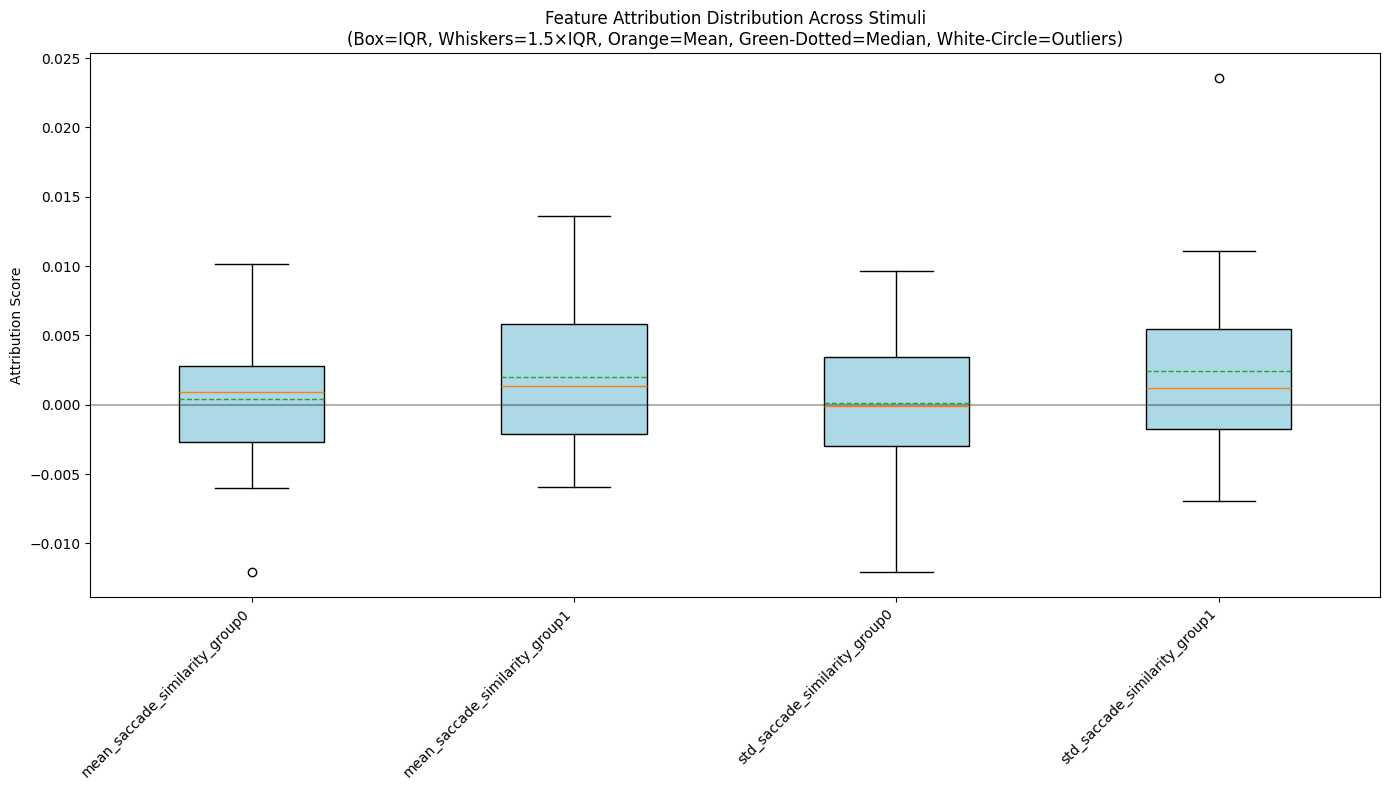


Feature Attribution Summary:
------------------------------------------------------------
mean_saccade_similarity_group0: Mean= 0.0004, Std= 0.0045, Min=-0.0121, Max= 0.0101
mean_saccade_similarity_group1: Mean= 0.0020, Std= 0.0047, Min=-0.0059, Max= 0.0136
std_saccade_similarity_group0 : Mean= 0.0001, Std= 0.0049, Min=-0.0121, Max= 0.0096
std_saccade_similarity_group1 : Mean= 0.0025, Std= 0.0061, Min=-0.0069, Max= 0.0236


In [53]:
feature_names = [
    "mean_saccade_similarity_group0",
    "mean_saccade_similarity_group1",
    "std_saccade_similarity_group0",
    "std_saccade_similarity_group1"
]
num_stimuli = 30
attributions = []
errors = []

for i in range(len(results)):
    input_tensor = results[i]['X_test']
    target_class = results[i]['y_test']

    att, err = explain_prediction(results[i]['model'], input_tensor, target_class)
    attributions.append(att.squeeze().cpu().detach().numpy())
    errors.append(err.cpu().numpy())

# Average across folds
attributions = np.array(attributions)
attributions = attributions.mean(axis=0)  # Average across folds if needed

if len(attributions.shape) > 1:
    attributions = np.mean(attributions, axis=0)  # Average across subjects if needed

# Reshape to get attribution matrix (features x stimuli)
attribution_matrix = attributions.reshape(len(feature_names), num_stimuli)

print(f"Approximation Error: {np.mean(errors)} (< 0.05 is good)")

# Create visualizations
print("\n" + "="*60)
print("FEATURE ANALYSIS")
print("="*60)

# Box plot visualization
visualize_attribution_boxplot(attribution_matrix, feature_names)

In [54]:
def vectorize(SimAndFeatureVals, subj, stim, vec):
    vector_roi = np.zeros((len(subj), 11))
    for s, subj_id in enumerate(subj):
        # add general features
        Features = GlobalFeature_array[stim][subj_id]
        vector_roi[s][0] = Features['number_fixation']
        vector_roi[s][1] = Features['mean_saccade_amplitude']
        vector_roi[s][2] = Features['mean_fixation_duration']
        vector_roi[s][3] = Features['total_reading_duration']
        vector_roi[s][4] = Features['regression']
        vector_roi[s][5] = Features['progression/regression']
        vector_roi[s][6] = SimAndFeatureVals[s][0][0][3] # landing of the first coordinate
        vector_roi[s][7] = SimAndFeatureVals[s][0][0][4] # mean saccade similarity group 0
        vector_roi[s][8] = SimAndFeatureVals[s][0][0][5] # mean saccade similarity group 1
        vector_roi[s][9] = SimAndFeatureVals[s][0][0][6] # std saccade similarity group 0
        vector_roi[s][10] = SimAndFeatureVals[s][0][0][7] # std saccade similarity group 1

    if vec.size != 0:
        vector_roi = np.append(vector_roi, vec, axis=1)
    return vector_roi

In [55]:
torch.manual_seed(42)
np.random.seed(42)

# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(330, 165)
        self.dropout1 = nn.Dropout(p=0.2)  
        self.fc2 = nn.Linear(165, 83)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(83, 42) 
        self.dropout3 = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(42, 2)
        self.softmax = nn.Softmax(dim=1)

        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.softmax(self.fc4(x)) 
        return x

In [56]:
results = train_test_pipeline(stimuli)

Using device: cuda
Epoch 0 loss: 0.740319550037384
Epoch 5 loss: 0.3424960672855377
Epoch 10 loss: 0.3368462920188904
Epoch 15 loss: 0.32712000608444214
Epoch 0 loss: 0.7101173400878906
Epoch 5 loss: 0.3879339396953583
Epoch 10 loss: 0.3501615524291992
Epoch 15 loss: 0.3275986611843109
Epoch 0 loss: 0.7355958223342896
Epoch 5 loss: 0.3909563720226288
Epoch 10 loss: 0.3425941467285156
Epoch 15 loss: 0.327570378780365
Epoch 0 loss: 0.6819241642951965
Epoch 5 loss: 0.414535254240036
Epoch 10 loss: 0.34015578031539917
Epoch 15 loss: 0.33083245158195496
Epoch 0 loss: 0.7226836085319519
Epoch 5 loss: 0.43367892503738403
Epoch 10 loss: 0.3473943769931793
Epoch 15 loss: 0.3300412595272064
Average accuracy: 0.888888888888889
Standard deviation: 0.09938079899999065
Total confusion matrix:
[[30.  5.]
 [ 0. 10.]]
False positives: 5.0
False negatives: 0.0


In [57]:
results = train_test_pipeline(stimuli, 0.5)

Using device: cuda
Epoch 0 loss: 0.740319550037384
Epoch 5 loss: 0.3613838851451874
Epoch 10 loss: 0.34516993165016174
Epoch 15 loss: 0.3199284076690674
Epoch 0 loss: 0.7101173400878906
Epoch 5 loss: 0.41510647535324097
Epoch 10 loss: 0.3750017583370209
Epoch 15 loss: 0.3344423174858093
Epoch 0 loss: 0.7355958223342896
Epoch 5 loss: 0.4173087179660797
Epoch 10 loss: 0.36353766918182373
Epoch 15 loss: 0.33471593260765076
Epoch 0 loss: 0.6819241642951965
Epoch 5 loss: 0.4386480152606964
Epoch 10 loss: 0.36975908279418945
Epoch 15 loss: 0.35594192147254944
Epoch 0 loss: 0.7226836085319519
Epoch 5 loss: 0.44841787219047546
Epoch 10 loss: 0.3567429184913635
Epoch 15 loss: 0.349754273891449
Average accuracy: 0.9333333333333332
Standard deviation: 0.054433105395181765
Total confusion matrix:
[[32.  3.]
 [ 0. 10.]]
False positives: 3.0
False negatives: 0.0


Approximation Error: -0.00010154396295547485 (< 0.05 is good)

FEATURE ANALYSIS


C:\Users\Utente\AppData\Local\Temp\ipykernel_48236\2144360451.py:50: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(box_data, labels=feature_names, patch_artist=True,


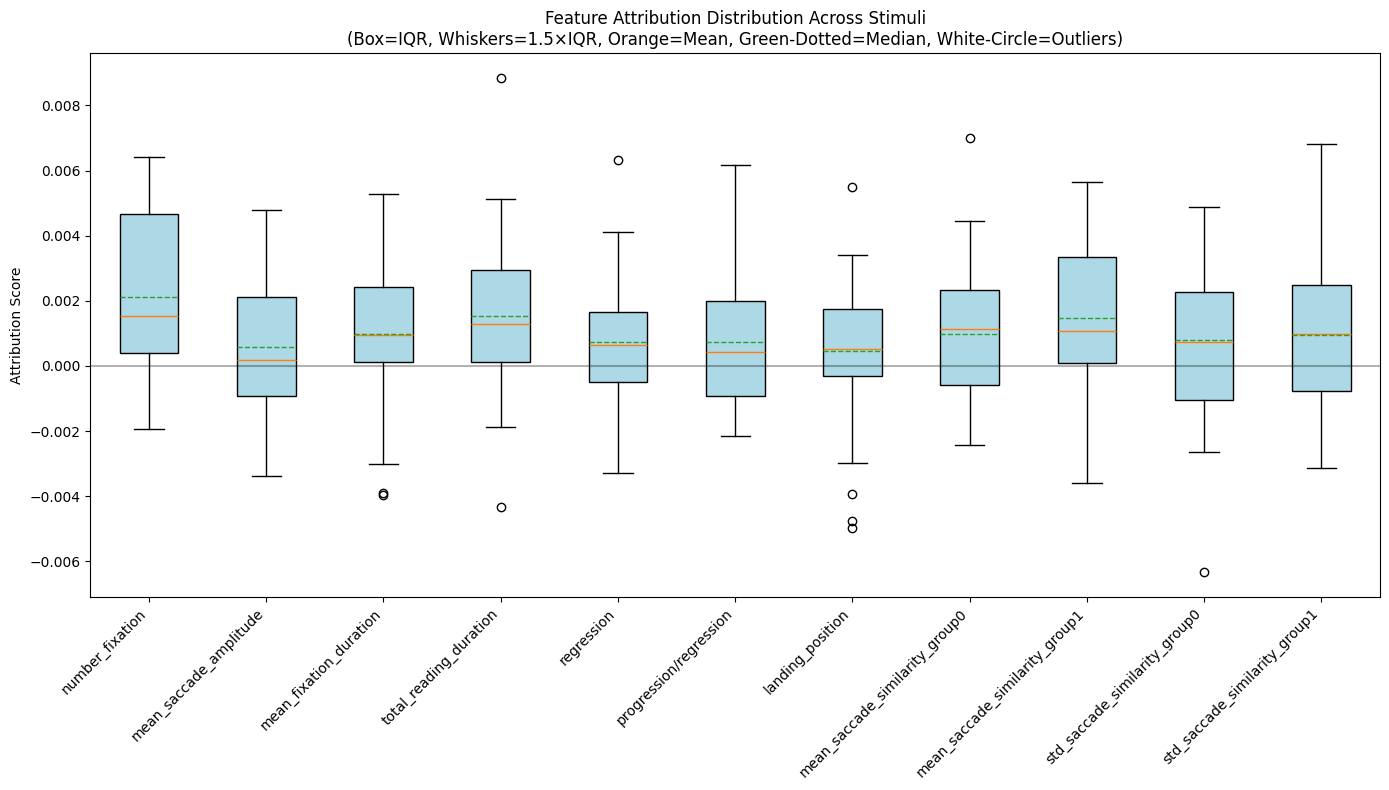


Feature Attribution Summary:
------------------------------------------------------------
number_fixation               : Mean= 0.0021, Std= 0.0025, Min=-0.0019, Max= 0.0064
mean_saccade_amplitude        : Mean= 0.0006, Std= 0.0021, Min=-0.0034, Max= 0.0048
mean_fixation_duration        : Mean= 0.0010, Std= 0.0024, Min=-0.0040, Max= 0.0053
total_reading_duration        : Mean= 0.0015, Std= 0.0025, Min=-0.0043, Max= 0.0088
regression                    : Mean= 0.0007, Std= 0.0019, Min=-0.0033, Max= 0.0063
progression/regression        : Mean= 0.0007, Std= 0.0020, Min=-0.0021, Max= 0.0062
landing_position              : Mean= 0.0005, Std= 0.0023, Min=-0.0050, Max= 0.0055
mean_saccade_similarity_group0: Mean= 0.0010, Std= 0.0023, Min=-0.0024, Max= 0.0070
mean_saccade_similarity_group1: Mean= 0.0015, Std= 0.0025, Min=-0.0036, Max= 0.0056
std_saccade_similarity_group0 : Mean= 0.0008, Std= 0.0024, Min=-0.0063, Max= 0.0049
std_saccade_similarity_group1 : Mean= 0.0010, Std= 0.0024, Min=-0.003

In [58]:
feature_names = [
    "number_fixation",
    "mean_saccade_amplitude",
    "mean_fixation_duration",
    "total_reading_duration",
    "regression",
    "progression/regression",
    "landing_position",
    "mean_saccade_similarity_group0",
    "mean_saccade_similarity_group1",
    "std_saccade_similarity_group0",
    "std_saccade_similarity_group1"
]
num_stimuli = 30
attributions = []
errors = []

for i in range(len(results)):
    input_tensor = results[i]['X_test']
    target_class = results[i]['y_test']

    att, err = explain_prediction(results[i]['model'], input_tensor, target_class)
    attributions.append(att.squeeze().cpu().detach().numpy())
    errors.append(err.cpu().numpy())

# Average across folds
attributions = np.array(attributions)
attributions = attributions.mean(axis=0)  # Average across folds if needed

if len(attributions.shape) > 1:
    attributions = np.mean(attributions, axis=0)  # Average across subjects if needed

# Reshape to get attribution matrix (features x stimuli)
attribution_matrix = attributions.reshape(len(feature_names), num_stimuli)

print(f"Approximation Error: {np.mean(errors)} (< 0.05 is good)")

# Create visualizations
print("\n" + "="*60)
print("FEATURE ANALYSIS")
print("="*60)

# Box plot visualization
visualize_attribution_boxplot(attribution_matrix, feature_names)

#### Original and Avg Similarity

In [59]:
def vectorize(SimAndFeatureVals, subj, stim, vec):
    vector_roi = np.zeros((len(subj), 9))
    for s, subj_id in enumerate(subj):
        # add general features
        Features = GlobalFeature_array[stim][subj_id]
        vector_roi[s][0] = Features['number_fixation']
        vector_roi[s][1] = Features['mean_saccade_amplitude']
        vector_roi[s][2] = Features['mean_fixation_duration']
        vector_roi[s][3] = Features['total_reading_duration']
        vector_roi[s][4] = Features['regression']
        vector_roi[s][5] = Features['progression/regression']
        vector_roi[s][6] = SimAndFeatureVals[s][0][0][3] # landing of the first coordinate
        vector_roi[s][7] = SimAndFeatureVals[s][0][0][4] # mean saccade similarity group 0
        vector_roi[s][8] = SimAndFeatureVals[s][0][0][5] # mean saccade similarity group 1

    if vec.size != 0:
        vector_roi = np.append(vector_roi, vec, axis=1)
    return vector_roi

In [60]:
torch.manual_seed(42)
np.random.seed(42)

# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(270, 130)
        self.dropout1 = nn.Dropout(p=0.2)  
        self.fc2 = nn.Linear(130, 65)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(65, 33) 
        self.dropout3 = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(33, 2)
        self.softmax = nn.Softmax(dim=1)

        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.softmax(self.fc4(x)) 
        return x
    
results = train_test_pipeline(stimuli)

Using device: cuda
Epoch 0 loss: 0.802385687828064
Epoch 5 loss: 0.458191841840744
Epoch 10 loss: 0.3687051236629486
Epoch 15 loss: 0.34215256571769714
Epoch 0 loss: 0.6715965270996094
Epoch 5 loss: 0.423422247171402
Epoch 10 loss: 0.3508961796760559
Epoch 15 loss: 0.32925406098365784
Epoch 0 loss: 0.6342827081680298
Epoch 5 loss: 0.4045906662940979
Epoch 10 loss: 0.3492024540901184
Epoch 15 loss: 0.33718857169151306
Epoch 0 loss: 0.8082922101020813
Epoch 5 loss: 0.4452100098133087
Epoch 10 loss: 0.3476087749004364
Epoch 15 loss: 0.32900211215019226
Epoch 0 loss: 0.8528501391410828
Epoch 5 loss: 0.4432508647441864
Epoch 10 loss: 0.35083621740341187
Epoch 15 loss: 0.32024750113487244
Average accuracy: 0.9333333333333332
Standard deviation: 0.08888888888888889
Total confusion matrix:
[[32.  3.]
 [ 0. 10.]]
False positives: 3.0
False negatives: 0.0


In [61]:
results = train_test_pipeline(stimuli, 0.5)

Using device: cuda
Epoch 0 loss: 0.802385687828064
Epoch 5 loss: 0.4800013601779938
Epoch 10 loss: 0.3750722110271454
Epoch 15 loss: 0.3402766287326813
Epoch 0 loss: 0.6715965270996094
Epoch 5 loss: 0.44456151127815247
Epoch 10 loss: 0.3613564074039459
Epoch 15 loss: 0.3496319055557251
Epoch 0 loss: 0.6342827081680298
Epoch 5 loss: 0.43537357449531555
Epoch 10 loss: 0.383584588766098
Epoch 15 loss: 0.35450050234794617
Epoch 0 loss: 0.8082922101020813
Epoch 5 loss: 0.47356703877449036
Epoch 10 loss: 0.3912087678909302
Epoch 15 loss: 0.35048907995224
Epoch 0 loss: 0.8528501391410828
Epoch 5 loss: 0.4663841724395752
Epoch 10 loss: 0.3596092462539673
Epoch 15 loss: 0.3368632197380066
Average accuracy: 0.9555555555555555
Standard deviation: 0.054433105395181765
Total confusion matrix:
[[33.  2.]
 [ 0. 10.]]
False positives: 2.0
False negatives: 0.0


Approximation Error: 0.0004283025918994099 (< 0.05 is good)

FEATURE ANALYSIS


C:\Users\Utente\AppData\Local\Temp\ipykernel_48236\2144360451.py:50: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(box_data, labels=feature_names, patch_artist=True,


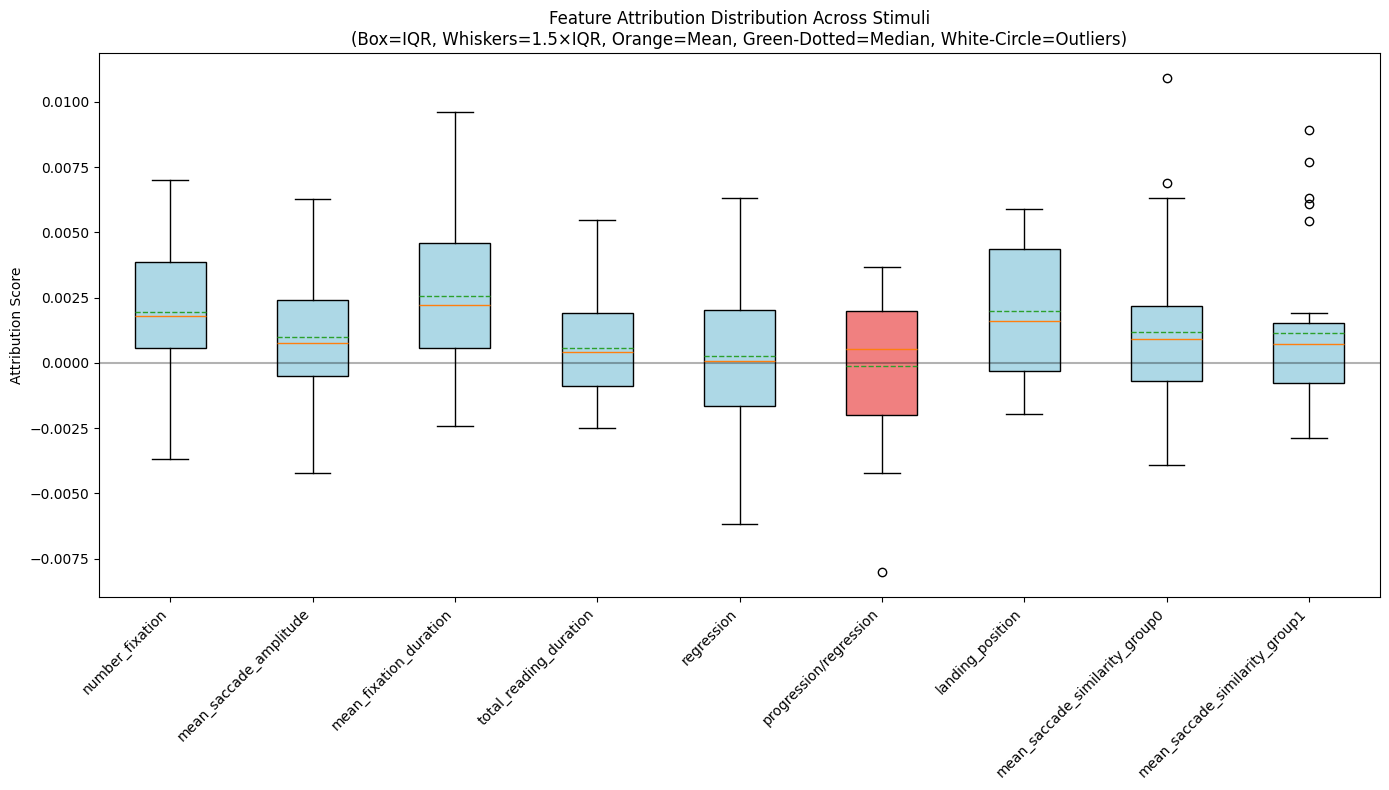


Feature Attribution Summary:
------------------------------------------------------------
number_fixation               : Mean= 0.0019, Std= 0.0023, Min=-0.0037, Max= 0.0070
mean_saccade_amplitude        : Mean= 0.0010, Std= 0.0027, Min=-0.0042, Max= 0.0063
mean_fixation_duration        : Mean= 0.0026, Std= 0.0031, Min=-0.0024, Max= 0.0096
total_reading_duration        : Mean= 0.0006, Std= 0.0020, Min=-0.0025, Max= 0.0055
regression                    : Mean= 0.0003, Std= 0.0027, Min=-0.0062, Max= 0.0063
progression/regression        : Mean=-0.0001, Std= 0.0028, Min=-0.0080, Max= 0.0037
landing_position              : Mean= 0.0020, Std= 0.0025, Min=-0.0020, Max= 0.0059
mean_saccade_similarity_group0: Mean= 0.0012, Std= 0.0030, Min=-0.0039, Max= 0.0109
mean_saccade_similarity_group1: Mean= 0.0011, Std= 0.0029, Min=-0.0029, Max= 0.0089


In [62]:
feature_names = [
    "number_fixation",
    "mean_saccade_amplitude",
    "mean_fixation_duration",
    "total_reading_duration",
    "regression",
    "progression/regression",
    "landing_position",
    "mean_saccade_similarity_group0",
    "mean_saccade_similarity_group1",
]
num_stimuli = 30
attributions = []
errors = []

for i in range(len(results)):
    input_tensor = results[i]['X_test']
    target_class = results[i]['y_test']

    att, err = explain_prediction(results[i]['model'], input_tensor, target_class)
    attributions.append(att.squeeze().cpu().detach().numpy())
    errors.append(err.cpu().numpy())

# Average across folds
attributions = np.array(attributions)
attributions = attributions.mean(axis=0)  # Average across folds if needed

if len(attributions.shape) > 1:
    attributions = np.mean(attributions, axis=0)  # Average across subjects if needed

# Reshape to get attribution matrix (features x stimuli)
attribution_matrix = attributions.reshape(len(feature_names), num_stimuli)

print(f"Approximation Error: {np.mean(errors)} (< 0.05 is good)")

# Create visualizations
print("\n" + "="*60)
print("FEATURE ANALYSIS")
print("="*60)

# Box plot visualization
visualize_attribution_boxplot(attribution_matrix, feature_names)

#### Original and Avg Similarity (without mean saccade amplitude)

In [63]:
def vectorize(SimAndFeatureVals, subj, stim, vec):
    vector_roi = np.zeros((len(subj), 8))
    for s, subj_id in enumerate(subj):
        # add general features
        Features = GlobalFeature_array[stim][subj_id]
        vector_roi[s][0] = Features['number_fixation']
        vector_roi[s][1] = Features['mean_fixation_duration']
        vector_roi[s][2] = Features['total_reading_duration']
        vector_roi[s][3] = Features['regression']
        vector_roi[s][4] = Features['progression/regression']
        vector_roi[s][5] = SimAndFeatureVals[s][0][0][3]
        vector_roi[s][6] = SimAndFeatureVals[s][0][0][4]
        vector_roi[s][7] = SimAndFeatureVals[s][0][0][5]

    if vec.size != 0:
        vector_roi = np.append(vector_roi, vec, axis=1)
    return vector_roi

In [64]:
torch.manual_seed(42)
np.random.seed(42)

# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(240, 120)
        self.dropout1 = nn.Dropout(p=0.2)  
        self.fc2 = nn.Linear(120, 60)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(60, 30) 
        self.dropout3 = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(30, 2)
        self.softmax = nn.Softmax(dim=1)

        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.softmax(self.fc4(x)) 
        return x
    
results = train_test_pipeline(stimuli)

Using device: cuda
Epoch 0 loss: 0.6819341778755188
Epoch 5 loss: 0.48468464612960815
Epoch 10 loss: 0.3597199618816376
Epoch 15 loss: 0.34446948766708374
Epoch 0 loss: 0.7540895342826843
Epoch 5 loss: 0.42521432042121887
Epoch 10 loss: 0.3539445698261261
Epoch 15 loss: 0.3348437249660492
Epoch 0 loss: 0.7132648825645447
Epoch 5 loss: 0.4087250828742981
Epoch 10 loss: 0.3719819188117981
Epoch 15 loss: 0.33073151111602783
Epoch 0 loss: 0.7147268056869507
Epoch 5 loss: 0.3950669765472412
Epoch 10 loss: 0.3514929413795471
Epoch 15 loss: 0.3386019170284271
Epoch 0 loss: 0.6739370226860046
Epoch 5 loss: 0.4473513066768646
Epoch 10 loss: 0.3720134198665619
Epoch 15 loss: 0.3375544548034668
Average accuracy: 0.9111111111111111
Standard deviation: 0.08314794192830981
Total confusion matrix:
[[31.  4.]
 [ 0. 10.]]
False positives: 4.0
False negatives: 0.0


In [65]:
results = train_test_pipeline(stimuli, 0.5)

Using device: cuda
Epoch 0 loss: 0.6819341778755188
Epoch 5 loss: 0.49153390526771545
Epoch 10 loss: 0.3916991949081421
Epoch 15 loss: 0.368240624666214
Epoch 0 loss: 0.7540895342826843
Epoch 5 loss: 0.4511537253856659
Epoch 10 loss: 0.36098429560661316
Epoch 15 loss: 0.35775092244148254
Epoch 0 loss: 0.7132648825645447
Epoch 5 loss: 0.4332702159881592
Epoch 10 loss: 0.3845418095588684
Epoch 15 loss: 0.355929434299469
Epoch 0 loss: 0.7147268056869507
Epoch 5 loss: 0.41151687502861023
Epoch 10 loss: 0.38442760705947876
Epoch 15 loss: 0.34974101185798645
Epoch 0 loss: 0.6739370226860046
Epoch 5 loss: 0.47641435265541077
Epoch 10 loss: 0.4084163308143616
Epoch 15 loss: 0.3672350347042084
Average accuracy: 0.9333333333333332
Standard deviation: 0.05443310539518176
Total confusion matrix:
[[33.  2.]
 [ 1.  9.]]
False positives: 2.0
False negatives: 1.0


Approximation Error: 6.781783304177225e-05 (< 0.05 is good)

FEATURE ANALYSIS


C:\Users\Utente\AppData\Local\Temp\ipykernel_48236\2144360451.py:50: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(box_data, labels=feature_names, patch_artist=True,


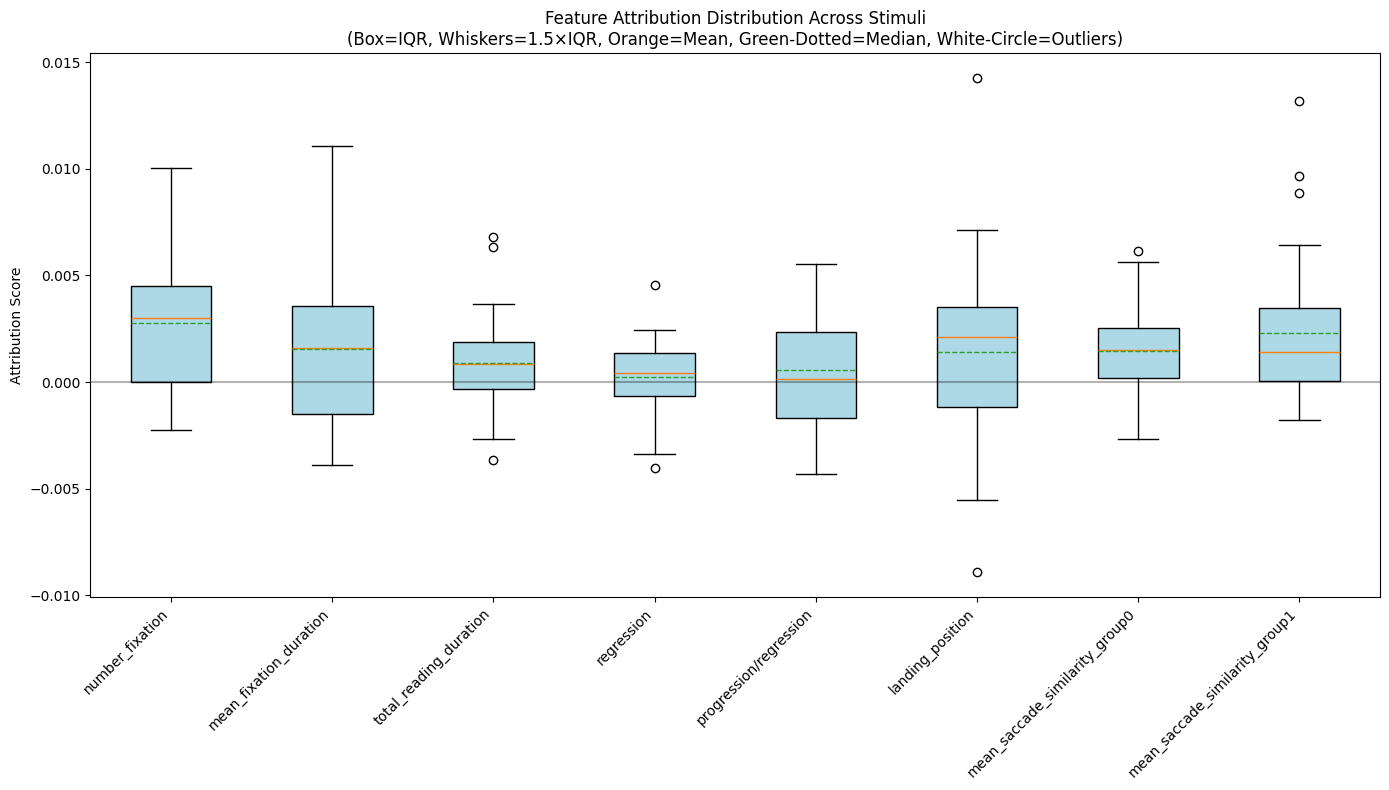


Feature Attribution Summary:
------------------------------------------------------------
number_fixation               : Mean= 0.0028, Std= 0.0032, Min=-0.0022, Max= 0.0100
mean_fixation_duration        : Mean= 0.0016, Std= 0.0041, Min=-0.0039, Max= 0.0111
total_reading_duration        : Mean= 0.0009, Std= 0.0022, Min=-0.0037, Max= 0.0068
regression                    : Mean= 0.0003, Std= 0.0018, Min=-0.0040, Max= 0.0045
progression/regression        : Mean= 0.0005, Std= 0.0026, Min=-0.0043, Max= 0.0055
landing_position              : Mean= 0.0014, Std= 0.0042, Min=-0.0089, Max= 0.0143
mean_saccade_similarity_group0: Mean= 0.0014, Std= 0.0021, Min=-0.0027, Max= 0.0062
mean_saccade_similarity_group1: Mean= 0.0023, Std= 0.0035, Min=-0.0018, Max= 0.0132


In [66]:
feature_names = [
    "number_fixation",
    "mean_fixation_duration",
    "total_reading_duration",
    "regression",
    "progression/regression",
    "landing_position",
    "mean_saccade_similarity_group0",
    "mean_saccade_similarity_group1",
]
num_stimuli = 30
attributions = []
errors = []

for i in range(len(results)):
    input_tensor = results[i]['X_test']
    target_class = results[i]['y_test']

    att, err = explain_prediction(results[i]['model'], input_tensor, target_class)
    attributions.append(att.squeeze().cpu().detach().numpy())
    errors.append(err.cpu().numpy())

# Average across folds
attributions = np.array(attributions)
attributions = attributions.mean(axis=0)  # Average across folds if needed

if len(attributions.shape) > 1:
    attributions = np.mean(attributions, axis=0)  # Average across subjects if needed

# Reshape to get attribution matrix (features x stimuli)
attribution_matrix = attributions.reshape(len(feature_names), num_stimuli)

print(f"Approximation Error: {np.mean(errors)} (< 0.05 is good)")

# Create visualizations
print("\n" + "="*60)
print("FEATURE ANALYSIS")
print("="*60)

# Box plot visualization
visualize_attribution_boxplot(attribution_matrix, feature_names)

In [67]:
def vectorize(SimAndFeatureVals, subj, stim, vec):
    vector_roi = np.zeros((len(subj), 10))
    for s, subj_id in enumerate(subj):
        # add general features
        Features = GlobalFeature_array[stim][subj_id]
        vector_roi[s][0] = Features['number_fixation']
        vector_roi[s][1] = Features['mean_fixation_duration']
        vector_roi[s][2] = Features['total_reading_duration']
        vector_roi[s][3] = Features['regression']
        vector_roi[s][4] = Features['progression/regression']
        vector_roi[s][5] = SimAndFeatureVals[s][0][0][3] # landing of the first coordinate
        vector_roi[s][6] = SimAndFeatureVals[s][0][0][4] # mean saccade similarity group 0
        vector_roi[s][7] = SimAndFeatureVals[s][0][0][5] # mean saccade similarity group 1
        vector_roi[s][8] = SimAndFeatureVals[s][0][0][6] # std saccade similarity group 0
        vector_roi[s][9] = SimAndFeatureVals[s][0][0][7] # std saccade similarity group 1

    if vec.size != 0:
        vector_roi = np.append(vector_roi, vec, axis=1)
    return vector_roi

In [68]:
torch.manual_seed(42)
np.random.seed(42)

# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(300, 150)
        self.dropout1 = nn.Dropout(p=0.2)  
        self.fc2 = nn.Linear(150, 75)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(75, 32) 
        self.dropout3 = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(32, 2)
        self.softmax = nn.Softmax(dim=1)

        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.softmax(self.fc4(x)) 
        return x
    
results = train_test_pipeline(stimuli)

Using device: cuda
Epoch 0 loss: 0.7600660920143127
Epoch 5 loss: 0.4044052064418793
Epoch 10 loss: 0.359720379114151
Epoch 15 loss: 0.3448929190635681
Epoch 0 loss: 0.8219793438911438
Epoch 5 loss: 0.4373370409011841
Epoch 10 loss: 0.36651915311813354
Epoch 15 loss: 0.3497655987739563
Epoch 0 loss: 0.6984186768531799
Epoch 5 loss: 0.39316290616989136
Epoch 10 loss: 0.3413470685482025
Epoch 15 loss: 0.32867634296417236
Epoch 0 loss: 0.6232044100761414
Epoch 5 loss: 0.39939984679222107
Epoch 10 loss: 0.34295356273651123
Epoch 15 loss: 0.3241086006164551
Epoch 0 loss: 0.6113027930259705
Epoch 5 loss: 0.39388397336006165
Epoch 10 loss: 0.3467593491077423
Epoch 15 loss: 0.32990193367004395
Average accuracy: 0.9111111111111111
Standard deviation: 0.12957670877434002
Total confusion matrix:
[[31.  4.]
 [ 0. 10.]]
False positives: 4.0
False negatives: 0.0


In [69]:
results = train_test_pipeline(stimuli, 0.5)

Using device: cuda
Epoch 0 loss: 0.7600660920143127
Epoch 5 loss: 0.4386831820011139
Epoch 10 loss: 0.38215190172195435
Epoch 15 loss: 0.356848806142807
Epoch 0 loss: 0.8219793438911438
Epoch 5 loss: 0.4546939730644226
Epoch 10 loss: 0.38221463561058044
Epoch 15 loss: 0.36346787214279175
Epoch 0 loss: 0.6984186768531799
Epoch 5 loss: 0.42782431840896606
Epoch 10 loss: 0.37689271569252014
Epoch 15 loss: 0.33313173055648804
Epoch 0 loss: 0.6232044100761414
Epoch 5 loss: 0.43725842237472534
Epoch 10 loss: 0.3756730556488037
Epoch 15 loss: 0.3501456081867218
Epoch 0 loss: 0.6113027930259705
Epoch 5 loss: 0.41257455945014954
Epoch 10 loss: 0.37236955761909485
Epoch 15 loss: 0.33807918429374695
Average accuracy: 0.9555555555555555
Standard deviation: 0.08888888888888889
Total confusion matrix:
[[33.  2.]
 [ 0. 10.]]
False positives: 2.0
False negatives: 0.0


Approximation Error: -0.00043866949272342026 (< 0.05 is good)

FEATURE ANALYSIS


C:\Users\Utente\AppData\Local\Temp\ipykernel_48236\2144360451.py:50: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(box_data, labels=feature_names, patch_artist=True,


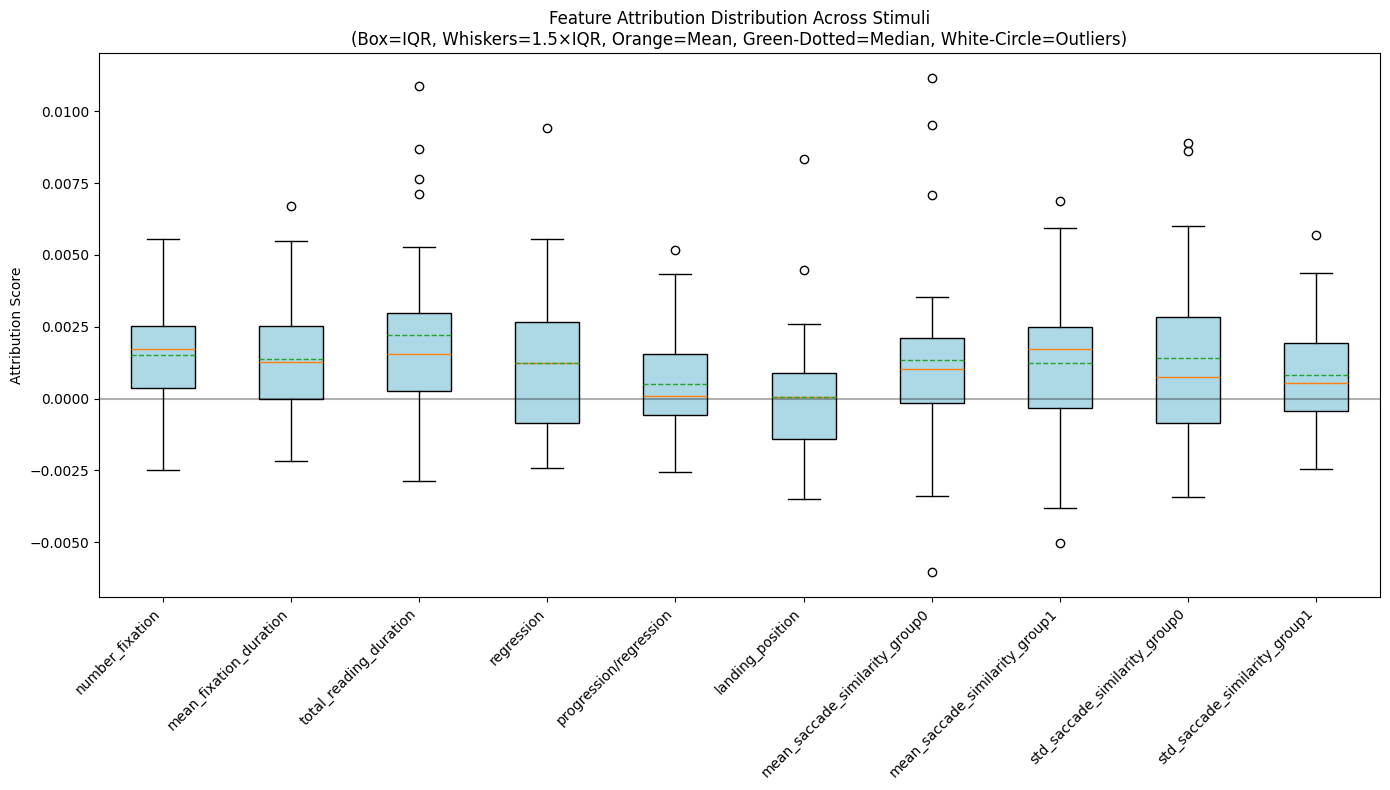


Feature Attribution Summary:
------------------------------------------------------------
number_fixation               : Mean= 0.0015, Std= 0.0019, Min=-0.0025, Max= 0.0056
mean_fixation_duration        : Mean= 0.0014, Std= 0.0022, Min=-0.0022, Max= 0.0067
total_reading_duration        : Mean= 0.0022, Std= 0.0031, Min=-0.0029, Max= 0.0109
regression                    : Mean= 0.0012, Std= 0.0026, Min=-0.0024, Max= 0.0094
progression/regression        : Mean= 0.0005, Std= 0.0017, Min=-0.0025, Max= 0.0052
landing_position              : Mean= 0.0001, Std= 0.0023, Min=-0.0035, Max= 0.0083
mean_saccade_similarity_group0: Mean= 0.0013, Std= 0.0034, Min=-0.0060, Max= 0.0112
mean_saccade_similarity_group1: Mean= 0.0012, Std= 0.0025, Min=-0.0050, Max= 0.0069
std_saccade_similarity_group0 : Mean= 0.0014, Std= 0.0032, Min=-0.0034, Max= 0.0089
std_saccade_similarity_group1 : Mean= 0.0008, Std= 0.0019, Min=-0.0025, Max= 0.0057


In [70]:
feature_names = [
    "number_fixation",
    "mean_fixation_duration", 
    "total_reading_duration",
    "regression",
    "progression/regression",
    "landing_position",
    "mean_saccade_similarity_group0",
    "mean_saccade_similarity_group1",
    "std_saccade_similarity_group0",
    "std_saccade_similarity_group1"
]
num_stimuli = 30
attributions = []
errors = []

for i in range(len(results)):
    input_tensor = results[i]['X_test']
    target_class = results[i]['y_test']

    att, err = explain_prediction(results[i]['model'], input_tensor, target_class)
    attributions.append(att.squeeze().cpu().detach().numpy())
    errors.append(err.cpu().numpy())

# Average across folds
attributions = np.array(attributions)
attributions = attributions.mean(axis=0)  # Average across folds if needed

if len(attributions.shape) > 1:
    attributions = np.mean(attributions, axis=0)  # Average across subjects if needed

# Reshape to get attribution matrix (features x stimuli)
attribution_matrix = attributions.reshape(len(feature_names), num_stimuli)

print(f"Approximation Error: {np.mean(errors)} (< 0.05 is good)")

# Create visualizations
print("\n" + "="*60)
print("FEATURE ANALYSIS")
print("="*60)

# Box plot visualization
visualize_attribution_boxplot(attribution_matrix, feature_names)

#### All

In [71]:
def vectorize(SimAndFeatureVals, subj, stim, vec):
    vector_roi = np.zeros((len(subj), 14))
    for s, subj_id in enumerate(subj):
        # add general features
        Features = GlobalFeature_array[stim][subj_id]
        vector_roi[s][0] = Features['number_fixation']
        vector_roi[s][1] = Features['mean_saccade_amplitude']
        vector_roi[s][2] = Features['std_fixation_duration']
        vector_roi[s][3] = Features['mean_fixation_duration']
        vector_roi[s][4] = Features['std_fixation_duration']
        vector_roi[s][5] = Features['total_reading_duration']
        vector_roi[s][6] = Features['regression']
        vector_roi[s][7] = Features['progression/regression']
        vector_roi[s][8] = Features['fixation_entropy']
        vector_roi[s][9] = SimAndFeatureVals[s][0][0][3]
        vector_roi[s][10] = SimAndFeatureVals[s][0][0][4]
        vector_roi[s][11] = SimAndFeatureVals[s][0][0][5]
        vector_roi[s][12] = SimAndFeatureVals[s][0][0][6]
        vector_roi[s][13] = SimAndFeatureVals[s][0][0][7]
        
    
    if vec.size != 0:
        vector_roi = np.append(vector_roi, vec, axis=1)
    return vector_roi

In [72]:
torch.manual_seed(42)
np.random.seed(42)

# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(420, 210)
        self.dropout1 = nn.Dropout(p=0.2)  
        self.fc2 = nn.Linear(210, 105)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(105, 53) 
        self.dropout3 = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(53, 2)
        self.softmax = nn.Softmax(dim=1)

        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.softmax(self.fc4(x)) 
        return x
    
results = train_test_pipeline(stimuli)

Using device: cuda
Epoch 0 loss: 0.7191457152366638
Epoch 5 loss: 0.40959540009498596
Epoch 10 loss: 0.34743407368659973
Epoch 15 loss: 0.34123775362968445
Epoch 0 loss: 0.6133080720901489
Epoch 5 loss: 0.3656345009803772
Epoch 10 loss: 0.34669649600982666
Epoch 15 loss: 0.32947152853012085
Epoch 0 loss: 0.6824665069580078
Epoch 5 loss: 0.40579327940940857
Epoch 10 loss: 0.35871249437332153
Epoch 15 loss: 0.3282325565814972
Epoch 0 loss: 0.6370691061019897
Epoch 5 loss: 0.3862219750881195
Epoch 10 loss: 0.32815441489219666
Epoch 15 loss: 0.32473400235176086
Epoch 0 loss: 0.7483722567558289
Epoch 5 loss: 0.3708953261375427
Epoch 10 loss: 0.34497177600860596
Epoch 15 loss: 0.328471302986145
Average accuracy: 0.9333333333333332
Standard deviation: 0.054433105395181765
Total confusion matrix:
[[32.  3.]
 [ 0. 10.]]
False positives: 3.0
False negatives: 0.0


In [73]:
_ = train_test_pipeline(stimuli, 0.5)

Using device: cuda
Epoch 0 loss: 0.7191457152366638
Epoch 5 loss: 0.43250635266304016
Epoch 10 loss: 0.34995755553245544
Epoch 15 loss: 0.33075380325317383
Epoch 0 loss: 0.6133080720901489
Epoch 5 loss: 0.3845888078212738
Epoch 10 loss: 0.3560951352119446
Epoch 15 loss: 0.33037665486335754
Epoch 0 loss: 0.6824665069580078
Epoch 5 loss: 0.42337027192115784
Epoch 10 loss: 0.3530009090900421
Epoch 15 loss: 0.334005206823349
Epoch 0 loss: 0.6370691061019897
Epoch 5 loss: 0.4106874167919159
Epoch 10 loss: 0.3386862874031067
Epoch 15 loss: 0.3375405967235565
Epoch 0 loss: 0.7483722567558289
Epoch 5 loss: 0.37918365001678467
Epoch 10 loss: 0.35191547870635986
Epoch 15 loss: 0.3470725417137146
Average accuracy: 0.9777777777777779
Standard deviation: 0.04444444444444447
Total confusion matrix:
[[34.  1.]
 [ 0. 10.]]
False positives: 1.0
False negatives: 0.0


Approximation Error: 0.0007111618760973215 (< 0.05 is good)

FEATURE ANALYSIS


C:\Users\Utente\AppData\Local\Temp\ipykernel_48236\2144360451.py:50: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(box_data, labels=feature_names, patch_artist=True,


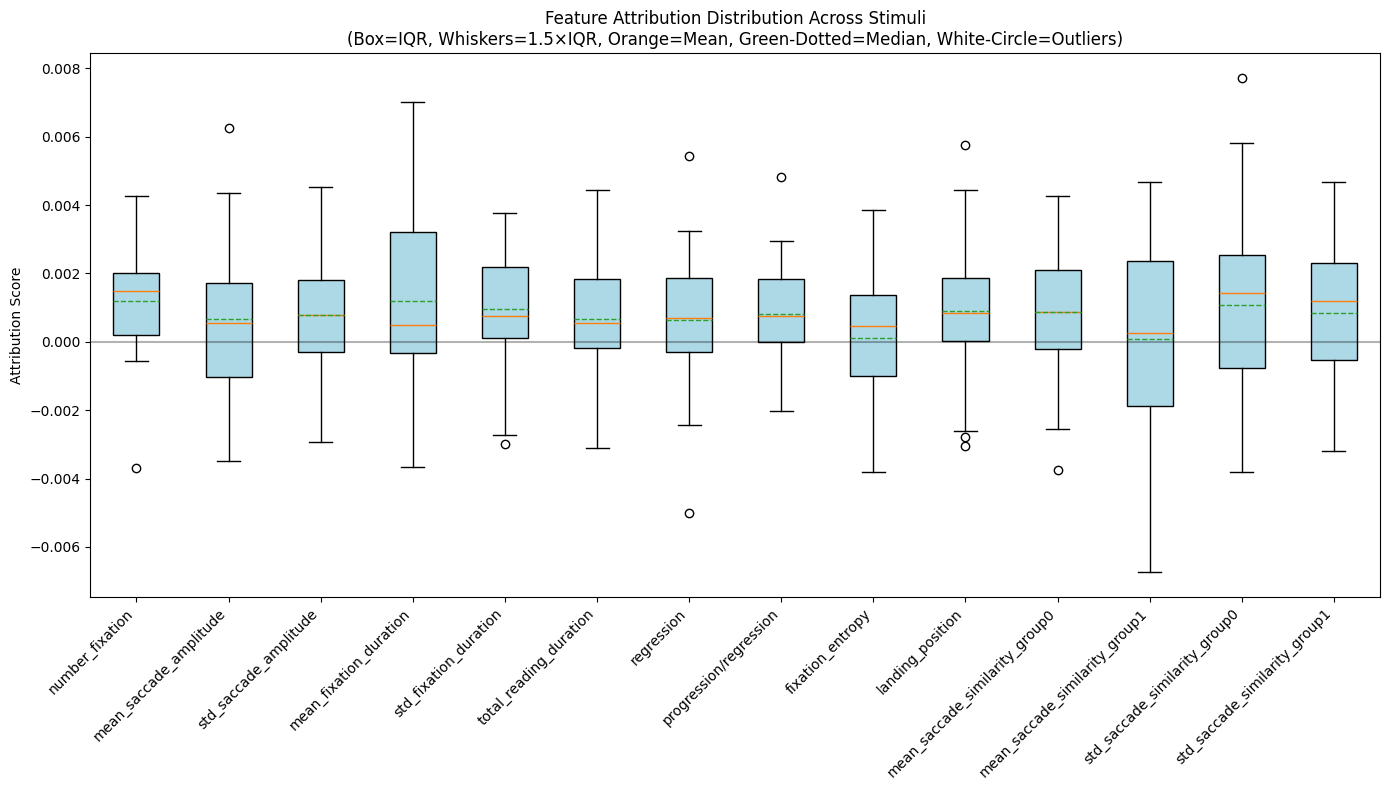


Feature Attribution Summary:
------------------------------------------------------------
number_fixation               : Mean= 0.0012, Std= 0.0015, Min=-0.0037, Max= 0.0043
mean_saccade_amplitude        : Mean= 0.0007, Std= 0.0022, Min=-0.0035, Max= 0.0062
std_saccade_amplitude         : Mean= 0.0008, Std= 0.0018, Min=-0.0029, Max= 0.0045
mean_fixation_duration        : Mean= 0.0012, Std= 0.0026, Min=-0.0037, Max= 0.0070
std_fixation_duration         : Mean= 0.0010, Std= 0.0017, Min=-0.0030, Max= 0.0038
total_reading_duration        : Mean= 0.0007, Std= 0.0018, Min=-0.0031, Max= 0.0044
regression                    : Mean= 0.0006, Std= 0.0020, Min=-0.0050, Max= 0.0054
progression/regression        : Mean= 0.0008, Std= 0.0014, Min=-0.0020, Max= 0.0048
fixation_entropy              : Mean= 0.0001, Std= 0.0020, Min=-0.0038, Max= 0.0039
landing_position              : Mean= 0.0009, Std= 0.0021, Min=-0.0030, Max= 0.0058
mean_saccade_similarity_group0: Mean= 0.0009, Std= 0.0018, Min=-0.003

In [74]:
feature_names = [
    "number_fixation",
    "mean_saccade_amplitude",
    "std_saccade_amplitude",
    "mean_fixation_duration",
    "std_fixation_duration",
    "total_reading_duration",
    "regression",
    "progression/regression",
    "fixation_entropy",
    "landing_position",
    "mean_saccade_similarity_group0",
    "mean_saccade_similarity_group1",
    "std_saccade_similarity_group0",
    "std_saccade_similarity_group1"
]
num_stimuli = 30
attributions = []
errors = []

for i in range(len(results)):
    input_tensor = results[i]['X_test']
    target_class = results[i]['y_test']

    att, err = explain_prediction(results[i]['model'], input_tensor, target_class)
    attributions.append(att.squeeze().cpu().detach().numpy())
    errors.append(err.cpu().numpy())

# Average across folds
attributions = np.array(attributions)
attributions = attributions.mean(axis=0)  # Average across folds if needed

if len(attributions.shape) > 1:
    attributions = np.mean(attributions, axis=0)  # Average across subjects if needed

# Reshape to get attribution matrix (features x stimuli)
attribution_matrix = attributions.reshape(len(feature_names), num_stimuli)

print(f"Approximation Error: {np.mean(errors)} (< 0.05 is good)")

# Create visualizations
print("\n" + "="*60)
print("FEATURE ANALYSIS")
print("="*60)

# Box plot visualization
visualize_attribution_boxplot(attribution_matrix, feature_names)

---

In [75]:
def vectorize(SimAndFeatureVals, subj, stim, vec):
    vector_roi = np.zeros((len(subj), 8))
    for s, subj_id in enumerate(subj):
        # add general features
        Features = GlobalFeature_array[stim][subj_id]
        vector_roi[s][0] = Features['number_fixation']
        vector_roi[s][1] = Features['regression']
        vector_roi[s][2] = Features['progression/regression']
        vector_roi[s][3] = SimAndFeatureVals[s][0][0][3]
        vector_roi[s][4] = SimAndFeatureVals[s][0][0][4]
        vector_roi[s][5] = SimAndFeatureVals[s][0][0][5] 
        vector_roi[s][6] = SimAndFeatureVals[s][0][0][6] 
        vector_roi[s][7] = SimAndFeatureVals[s][0][0][7]

    if vec.size != 0: 
        vector_roi = np.append(vector_roi, vec, axis=1)
    return vector_roi

In [76]:
import torch
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix
from IPython.utils import io
import numpy as np
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

torch.manual_seed(42)
np.random.seed(42)

# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(240, 120)
        self.dropout1 = nn.Dropout(p=0.2)  
        self.fc2 = nn.Linear(120, 60)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(60, 30) 
        self.dropout3 = nn.Dropout(p=0.2)
        self.fc4 = nn.Linear(30, 2)
        self.softmax = nn.Softmax(dim=1)

        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.softmax(self.fc4(x)) 
        return x
    

results = train_test_pipeline(stimuli)
results = train_test_pipeline(stimuli,0.5)

Using device: cuda
Epoch 0 loss: 0.7011327743530273
Epoch 5 loss: 0.4530450999736786
Epoch 10 loss: 0.3632325828075409
Epoch 15 loss: 0.34785908460617065
Epoch 0 loss: 0.7729046940803528
Epoch 5 loss: 0.4418581426143646
Epoch 10 loss: 0.36994487047195435
Epoch 15 loss: 0.35522016882896423
Epoch 0 loss: 0.7033319473266602
Epoch 5 loss: 0.4583863914012909
Epoch 10 loss: 0.37655097246170044
Epoch 15 loss: 0.34333160519599915
Epoch 0 loss: 0.739351212978363
Epoch 5 loss: 0.42731961607933044
Epoch 10 loss: 0.3895007371902466
Epoch 15 loss: 0.35051390528678894
Epoch 0 loss: 0.6693630218505859
Epoch 5 loss: 0.45806998014450073
Epoch 10 loss: 0.3900558352470398
Epoch 15 loss: 0.33852532505989075
Average accuracy: 0.9111111111111111
Standard deviation: 0.10886621079036347
Total confusion matrix:
[[31.  4.]
 [ 0. 10.]]
False positives: 4.0
False negatives: 0.0
Using device: cuda
Epoch 0 loss: 0.7011327743530273
Epoch 5 loss: 0.4726977050304413
Epoch 10 loss: 0.3842875361442566
Epoch 15 loss: 0.3